# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas que añadan aunque sea un poco de información a lo que está ocurriendo.


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [2]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [3]:
#url de este notebook en github
github_url = 'https://github.com/mharias/covid/blob/master/graficos_escovid19data.ipynb'

In [4]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [5]:
#url de la fuente de datos
path_montera34='https://github.com/montera34/escovid19data/blob/master/data/output/covid19-provincias-spain_consolidated.csv?raw=true'

Leemos los datos en un `pandas`

In [6]:
df = pd.read_csv(path_montera34)

veamos una rápida descripción de la información:

In [7]:
df.describe()

ine_code    new_cases          PCR         TestAc       activos  \
count  13879.000000  4381.000000  3944.000000     970.000000   1562.000000   
mean      26.503206    61.262954   109.253043    7533.160825   1118.638284   
std       15.011648   134.404521   228.279719   22046.312618   1576.101410   
min        1.000000   -67.000000   -67.000000       0.000000      0.000000   
25%       13.000000     4.000000     6.000000       3.000000    173.250000   
50%       27.000000    23.000000    37.000000      22.000000    520.000000   
75%       40.000000    65.000000   113.000000     482.750000   1312.000000   
max       52.000000  1992.000000  3982.000000  117877.000000  10275.000000   

       hospitalized  intensive_care      deceased  cases_accumulated  \
count   9955.000000     9818.000000  11136.000000        7104.000000   
mean     179.902963       24.719800    584.058459        5674.211712   
std      777.416055       89.445915   1792.800538       14028.472013   
min        0.000000        0.000000      0.000000           0.000000   
25%       11.000000        2.000000     91.000000         726.000000   
50%       44.000000        7.000000    206.000000        2058.000000   
75%      128.000000       20.000000    374.000000        4631.250000   
max    15227.000000     1528.000000  11930.000000      156273.000000   

       cases_accumulated_PCR     recovered     num_casos  \
count            8350.000000   7164.000000  13832.000000   
mean             8777.898922   1822.182141     75.191296   
std             24911.758190   2648.056460    265.722376   
min                 0.000000      0.000000      0.000000   
25%              1474.000000    431.000000      2.000000   
50%              3016.500000   1204.500000     14.000000   
75%              5834.750000   2142.250000     65.000000   
max            299982.000000  29753.000000   6743.000000   

       num_casos_prueba_pcr  num_casos_prueba_test_ac  num_casos_prueba_otras  \
count          13832.000000              13832.000000            13832.000000   
mean              69.860324                  1.495373                2.474913   
std              255.018118                  6.510070               37.241011   
min                0.000000                  0.000000                0.000000   
25%                1.000000                  0.000000                0.000000   
50%               11.000000                  0.000000                0.000000   
75%               59.000000                  0.000000                0.000000   
max             6730.000000                128.000000             1271.000000   

       num_casos_prueba_desconocida     poblacion  cases_per_cienmil  \
count                  13832.000000  1.387900e+04        7104.000000   
mean                       1.360685  9.038779e+05         511.428508   
std                        9.711385  1.175969e+06         557.172895   
min                        0.000000  8.477700e+04           0.000000   
25%                        0.000000  3.167980e+05         129.172500   
50%                        0.000000  5.810780e+05         327.610000   
75%                        0.000000  1.022800e+06         711.810000   
max                      261.000000  6.663394e+06        3870.660000   

       intensive_care_per_1000000  deceassed_per_100000  \
count                 9818.000000          11136.000000   
mean                     2.669687             53.653178   
std                      3.844917             51.177014   
min                      0.000000              0.000000   
25%                      0.310000             13.295000   
50%                      1.300000             35.190000   
75%                      3.470000             84.500000   
max                     28.720000            245.080000   

       hospitalized_per_100000  cases_14days   cases_7days  cases_PCR_14days  \
count              9955.000000   6246.000000   6625.000000       7640.000000   
mean                 20.396983   1222.344701   

y un muestreo de valores y de algunas columnas de interés:

In [8]:
df.head()

date          province  ine_code                     ccaa  new_cases  \
0  2020-01-31          Albacete         2     Castilla - La Mancha        NaN   
1  2020-01-31  Alicante/Alacant         3     Comunitat Valenciana        NaN   
2  2020-01-31           Almería         4                Andalucía        NaN   
3  2020-01-31       Araba/Álava         1               País Vasco        NaN   
4  2020-01-31          Asturias        33  Asturias, Principado de        NaN   

   PCR  TestAc  activos  hospitalized  intensive_care  deceased  \
0  NaN     NaN      NaN           NaN             NaN       NaN   
1  NaN     NaN      NaN           NaN             NaN       NaN   
2  NaN     NaN      NaN           NaN             NaN       NaN   
3  NaN     NaN      NaN           NaN             NaN       NaN   
4  NaN     NaN      NaN           NaN             NaN       NaN   

   cases_accumulated  cases_accumulated_PCR  recovered  num_casos  \
0                NaN                    NaN        NaN        0.0   
1                NaN                    NaN        NaN        0.0   
2                NaN                    NaN        NaN        0.0   
3                NaN                    NaN        NaN        0.0   
4                NaN                    NaN        NaN        0.0   

   num_casos_prueba_pcr  num_casos_prueba_test_ac  num_casos_prueba_otras  \
0                   0.0                       0.0                     0.0   
1                   0.0                       0.0                     0.0   
2                   0.0                       0.0                     0.0   
3                   0.0                       0.0                     0.0   
4                   0.0                       0.0                     0.0   

   num_casos_prueba_desconocida  poblacion  cases_per_cienmil  \
0                           0.0     388167                NaN   
1                           0.0    1858683                NaN   
2                           0.0     716820                NaN   
3                           0.0     331549                NaN   
4                           0.0    1022800                NaN   

   intensive_care_per_1000000  deceassed_per_100000  hospitalized_per_100000  \
0                         NaN                   NaN                      NaN   
1                         NaN                   NaN                      NaN   
2                         NaN                   NaN                      NaN   
3                         NaN                   NaN                      NaN   
4                         NaN                   NaN                      NaN   

   cases_14days  cases_7days  cases_PCR_14days  cases_PCR_7days  daily_cases  \
0           NaN          NaN               NaN              NaN          NaN   
1           NaN          NaN               NaN              NaN          NaN   
2           NaN          NaN               NaN              NaN          NaN   
3           NaN          NaN               NaN              NaN          NaN   
4           NaN          NaN               NaN              NaN          NaN   

   daily_cases_avg7  daily_cases_PCR  daily_cases_PCR_avg7  daily_deaths  \
0               NaN              NaN                   NaN           NaN   
1               NaN              NaN                   NaN           NaN   
2               NaN              NaN                   NaN           NaN   
3               NaN              NaN                   NaN           NaN   
4               NaN              NaN                   NaN           NaN   

   daily_deaths_inc  daily_deaths_avg3  daily_deaths_avg7  deaths_last_week  \
0               NaN                NaN                NaN               NaN   
1               NaN                NaN                NaN               NaN   
2               NaN                NaN                NaN               NaN   
3               NaN                NaN                NaN               NaN   
4               NaN                N

In [9]:
df.tail()

date    province  ine_code             ccaa  new_cases  PCR  \
13874  2020-10-24   Salamanca        37  Castilla y León      304.0  NaN   
13875  2020-10-24     Segovia        40  Castilla y León       81.0  NaN   
13876  2020-10-24       Soria        42  Castilla y León       41.0  NaN   
13877  2020-10-24  Valladolid        47  Castilla y León      383.0  NaN   
13878  2020-10-24      Zamora        49  Castilla y León      179.0  NaN   

       TestAc  activos  hospitalized  intensive_care  deceased  \
13874     NaN      NaN         167.0            27.0     471.0   
13875     NaN      NaN          35.0             2.0     234.0   
13876     NaN      NaN          26.0             4.0     137.0   
13877     NaN      NaN         250.0            43.0     544.0   
13878     NaN      NaN          99.0             6.0     162.0   

       cases_accumulated  cases_accumulated_PCR  recovered  num_casos  \
13874                NaN                12389.0     1942.0        NaN   
13875                NaN                 6449.0     1067.0        NaN   
13876                NaN                 4108.0      551.0        NaN   
13877                NaN                17384.0     2940.0        NaN   
13878                NaN                 4282.0      686.0        NaN   

       num_casos_prueba_pcr  num_casos_prueba_test_ac  num_casos_prueba_otras  \
13874                   NaN                       NaN                     NaN   
13875                   NaN                       NaN                     NaN   
13876                   NaN                       NaN                     NaN   
13877                   NaN                       NaN                     NaN   
13878                   NaN                       NaN                     NaN   

       num_casos_prueba_desconocida  poblacion  cases_per_cienmil  \
13874                           NaN     330119                NaN   
13875                           NaN     153129                NaN   
13876                           NaN      88636                NaN   
13877                           NaN     519546                NaN   
13878                           NaN     172539                NaN   

       intensive_care_per_1000000  deceassed_per_100000  \
13874                        8.18                142.68   
13875                        1.31                152.81   
13876                        4.51                154.56   
13877                        8.28                104.71   
13878                        3.48                 93.89   

       hospitalized_per_100000  cases_14days  cases_7days  cases_PCR_14days  \
13874                    50.59           NaN          NaN            2588.0   
13875                    22.86           NaN          NaN             676.0   
13876                    29.33           NaN          NaN             361.0   
13877                    48.12           NaN          NaN            3095.0   
13878                    57.38           NaN          NaN            1033.0   

       cases_PCR_7days  daily_cases  daily_cases_avg7  daily_cases_PCR  \
13874           1603.0          NaN               NaN            304.0   
13875            392.0          NaN               NaN             81.0   
13876            226.0          NaN               NaN             41.0   
13877           1891.0          NaN               NaN            384.0   
13878            689.0          NaN               NaN            180.0   

       daily_cases_PCR_avg7  daily_deaths  daily_deaths_inc  \
13874                 229.0           3.0               0.6   
13875                  56.0           1.0               0.4   
13876                  32.3           2.0               1.5   
13877                 270.1           4.0               0.7   
13878                  98.4           4.0               2.5   

       daily_deaths_avg3  daily_deaths_avg7  deaths_last_week  \
13874                2.0                2.3              16.0   
13875                0.3          

In [10]:
provincias = sorted(df['province'].unique())

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [11]:
df['date']=pd.to_datetime(df['date'])

In [12]:
df.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'intensive_care', 'deceased',
       'cases_accumulated', 'cases_accumulated_PCR', 'recovered', 'num_casos',
       'num_casos_prueba_pcr', 'num_casos_prueba_test_ac',
       'num_casos_prueba_otras', 'num_casos_prueba_desconocida', 'poblacion',
       'cases_per_cienmil', 'intensive_care_per_1000000',
       'deceassed_per_100000', 'hospitalized_per_100000', 'cases_14days',
       'cases_7days', 'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_inc', 'daily_deaths_avg3',
       'daily_deaths_avg7', 'deaths_last_week', 'num_casos_prueba_pcr_avg7',
       'ia14', 'source_name', 'source', 'comments'],
      dtype='object')

In [13]:
sorted(campos)

NameError: name 'campos' is not defined

In [14]:
campos = {'Almería':'daily_cases', 'Cádiz':'daily_cases', 'Córdoba':'daily_cases',
          'Granada':'daily_cases', 'Huelva':'daily_cases', 'Jaén':'daily_cases',
       'Málaga':'daily_cases', 'Sevilla':'daily_cases', 'Huesca':'daily_cases_PCR',
          'Teruel':'daily_cases_PCR', 'Zaragoza':'daily_cases_PCR', 
          'Asturias':'PCR','Balears, Illes':'PCR', 'Palmas, Las':'daily_cases', 
          'Santa Cruz de Tenerife':'daily_cases','Cantabria':'PCR',
          'Albacete':'daily_cases_PCR', 'Ciudad Real':'daily_cases_PCR',
          'Cuenca':'daily_cases_PCR', 'Guadalajara':'daily_cases_PCR',
       'Toledo':'daily_cases_PCR', 'Ávila':'daily_cases_PCR', 'Burgos':'daily_cases_PCR',
          'León':'daily_cases_PCR', 'Palencia':'daily_cases_PCR', 'Salamanca':'daily_cases_PCR',
       'Segovia':'daily_cases_PCR', 'Soria':'daily_cases_PCR', 'Valladolid':'daily_cases_PCR',
          'Zamora':'daily_cases_PCR', 'Barcelona':'daily_cases', 'Girona':'daily_cases',
       'Lleida':'daily_cases', 'Tarragona':'daily_cases', 'Ceuta':'new_cases',
          'Alicante/Alacant':'casos_nuevos_valencia','Castellón/Castelló':'casos_nuevos_valencia',
          'Valencia/València':'casos_nuevos_valencia','Badajoz':'new_cases', 'Cáceres':'new_cases',
       'Coruña, A':'daily_cases', 'Lugo':'daily_cases', 'Ourense':'daily_cases', 
          'Pontevedra':'daily_cases', 'Madrid':'daily_cases_PCR', 'Melilla':'PCR',
       'Murcia':'daily_cases', 'Navarra':'num_casos', 'Araba/Álava':'daily_cases_PCR',
          'Bizkaia':'daily_cases_PCR', 'Gipuzkoa':'daily_cases_PCR',
       'Rioja, La':'PCR'}

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

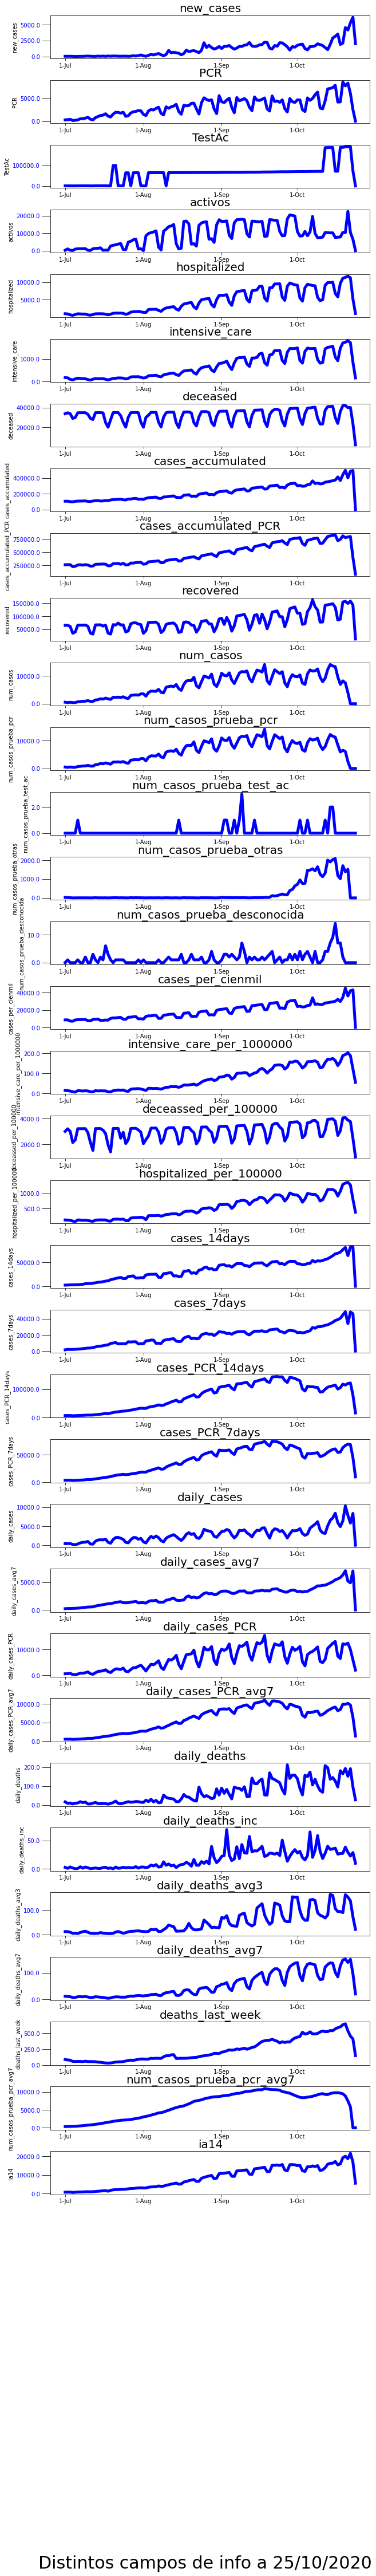

In [15]:
#un par de funciones para formatear

def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparamos los  datos: eliminamos las columnas no numéricas al no poderse representar gráficamente
#generamos un pandas 'datos'que habremos filtrado desde la fecha de los datos que queremos representrar

a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
    
    
#vamos a generar un gráfico matplotlib en al que añadiremos cada una de las columnas
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Distintos campos de info a '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)

#sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette("RdBu_r",19))

#iteramos sobre la lista de columnas y las añadimos como un eje adicional
for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

Una vez analizadas cada una de las columnas de datos podremos elegir las que queremos presentar..

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

In [201]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})

# Preparamos los datos. Es importante añadir un zero a los campos NotANumber..


datos = df.fillna(0,axis=1)
datos = datos.sort_values(by=['province','date'], inplace=False, ascending=True)
provincias = sorted(df['province'].unique())
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_ratio = 'red'
color_fill = 'royalblue'
color_titulos = 'navy'
color_linea='darkred'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='casos_nuevos'
casos_nuevos_valencia='casos_nuevos_valencia'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'
valencia=['Alicante/Alacant','Castellón/Castelló', 'Valencia/València']

for provincia in valencia:
    datos.loc[datos['province']==provincia,casos_nuevos_valencia]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,campos[provincia]].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie  
    

    


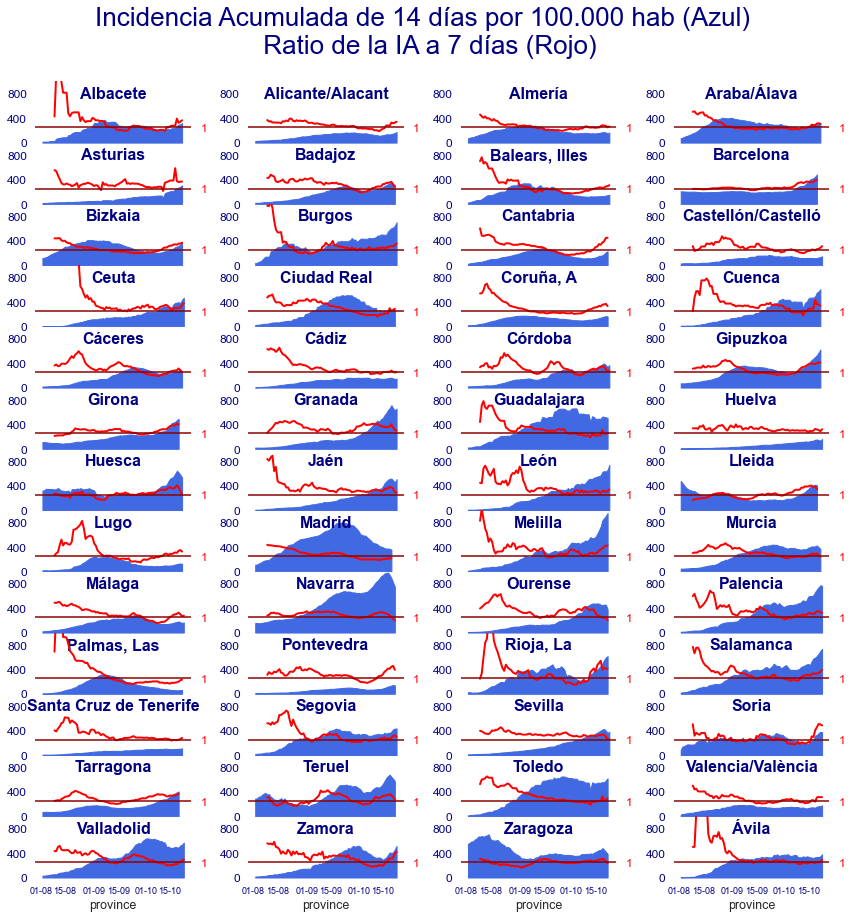

In [176]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0, palette=pal)
# Título



#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%d-%m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    
    
    ax1.set_ylim(0,1000)
    ax1.set_yticks([0,400,800])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
    ax1.set_xticks([])
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=2, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ratio)
    ax2.set_ylim(0,4)
    ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1,15]))
    
    
    #x0,x1=ax2.get_xlim()
    ax2.axhline(1,color=color_linea)
g.map(grafica,'province')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax.transAxes)

#g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
#g.set(yticks=[])
#g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...

#for ax in g.axes:
#    ax.xaxis.set_major_formatter(XmajorFmt)
 #   ax.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
 #   ax.xaxis.set_major_locator(DayLocator([1,15]))
    
#    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
#    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# [plt.setp(ax.texts, text="") for ax in g.axes.flat] 
# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)
#plt.tight_layout(w_pad=1,h_pad=10,pad=10)

#g.fig.subplots_adjust(top=.7)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
g.fig.subplots_adjust(top=.9)
plt.savefig('graficos/pcr_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()
#plt.close()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


# Gráficos de una lista específica de provincias

Y ahora preparemos gráficos más específicos por Comunidades siguiendo con el modelo `facetgrid` de `seaborn`. Veremos que en cada sección de preparación de datos filtraremos por la lista de provincias de cada comunidad.

# Andalucía

<Figure size 720x360 with 0 Axes>

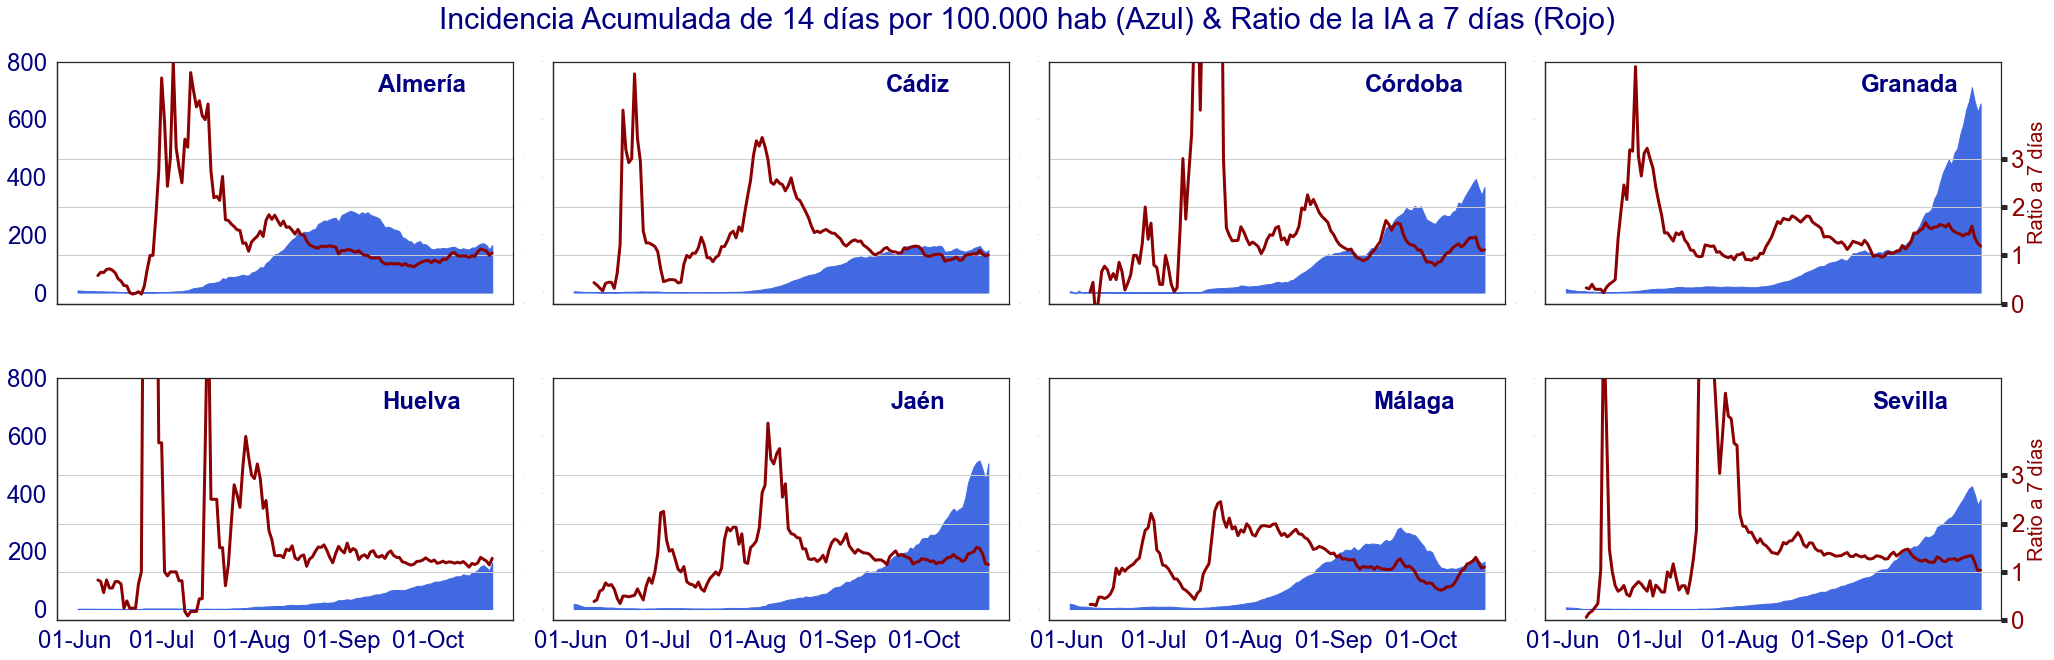

In [155]:

provincias=['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='daily_cases'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) & Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'

for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    

f = plt.figure(figsize=(10,5))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province', margin_titles=False, col_wrap=4,aspect=1.5, 
                  height=5, palette=pal)
# Título
#g.fig.set_figwidth(20)
#g.fig.set_figheight(10)
g.fig.suptitle(titulo,fontsize=30,color=color_titulos)
#g.fig.text(0.1, 0.04, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
#       fontsize=24,color=color_titulos)

#g.fig.text(0.1,0.01,'Código:{}'.format(github_url),
#           fontsize=24,horizontalalignment='left',color=color_titulos)


XmajorFmt = DateFormatter('%d-%b')

g.map(plt.fill_between, 'date',AI,color=color_diarios)

ejes = g.axes

for i,ax in enumerate(ejes):
    #ax.set_title('')
    ax.xaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_titulos)
    ax.grid(False)
    lista_y = ax.get_yticks()
    ax.set_yticks([0,200,400,600,800])
    ax.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_titulos)
    ax.set_xlabel('')
    if i % 4 ==0:
        #ax.set_yticks([0,200,400,600,800])
        ax.yaxis.set_tick_params(labelsize=24,labelcolor=color_titulos)
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))
        ax.set_ylabel(y_IA,size=20,color=color_avg)
        
    
    ax2 = ax.twinx()
    ax2.grid(True)
    ax2.set_yticks([0,1,2,3])
    ax2.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_avg)
    ax2.set_ylim(0,5)
    ax2.plot(datos['date'].unique(), datos[datos['province'] == provincias[i]][clave_ratio], lw=3, color=color_avg)
    
    ax2.xaxis.set_major_formatter(XmajorFmt)
    ax2.xaxis.set_tick_params(labelsize=14,width=5,labelcolor=color_titulos)
    ax2.xaxis.set_major_locator(DayLocator([1]))
    ax2.set_xlabel('')
    ax2.set_title('')
    
    if i % 4 ==3:
        
        ax2.yaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_avg)
        #ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
        ax2.set_yticks([0,1,2,3])
        ax2.set_ylabel(y_ratio,size=20,color=color_avg)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    #ax.set_title('')
    #ax.set_suptitle('')
    ax.text(0.8, .9, label, fontweight="bold",
            ha="center", va="center", size=24,transform=ax.transAxes,color=color_titulos)
g.map(label,'province')


axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("")
#    ax.set_ylabel('')
g.set_titles('')




# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
#g.fig.subplots_adjust(hspace=0.1,wspace=.1)

plt.tight_layout(w_pad=1,h_pad=5,pad=5)
plt.savefig('graficos/pcr+_andaluciaa.png',dpi=100)  
plt.show()

# Aragón

<Figure size 720x360 with 0 Axes>

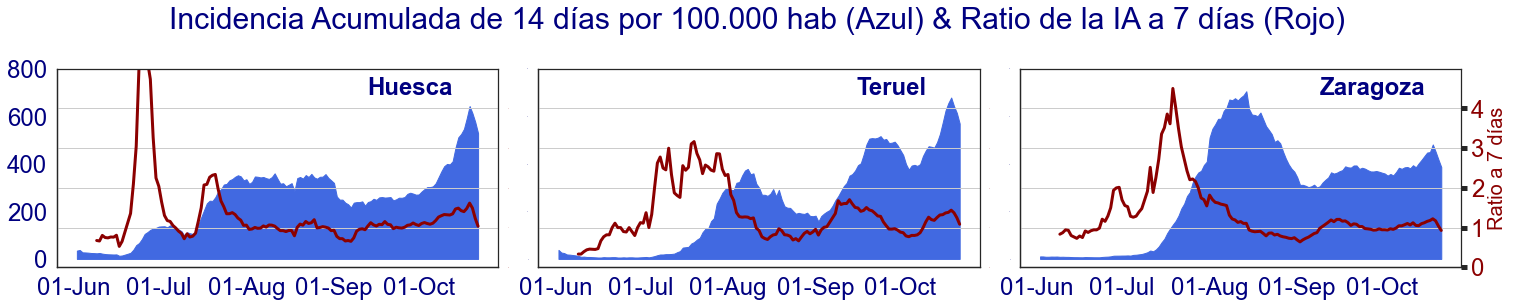

In [156]:
provincias=['Huesca','Teruel','Zaragoza']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='daily_cases_PCR'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) & Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'

for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    

f = plt.figure(figsize=(10,5))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province', margin_titles=False, col_wrap=3,aspect=1.5, 
                  height=5, palette=pal)
# Título
#g.fig.set_figwidth(20)
#g.fig.set_figheight(10)
g.fig.suptitle(titulo,fontsize=30,color=color_titulos)
#g.fig.text(0.1, 0.04, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
#       fontsize=24,color=color_titulos)

#g.fig.text(0.1,0.01,'Código:{}'.format(github_url),
#           fontsize=24,horizontalalignment='left',color=color_titulos)


XmajorFmt = DateFormatter('%d-%b')

g.map(plt.fill_between, 'date',AI,color=color_diarios)

ejes = g.axes

for i,ax in enumerate(ejes):
    #ax.set_title('')
    ax.xaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_titulos)
    ax.grid(False)
    lista_y = ax.get_yticks()
    ax.set_yticks([0,200,400,600,800])
    ax.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_titulos)
    ax.set_xlabel('')
    if i % 3 ==0:
        #ax.set_yticks([0,200,400,600,800])
        ax.yaxis.set_tick_params(labelsize=24,labelcolor=color_titulos)
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))
        ax.set_ylabel(y_IA,size=20,color=color_avg)
        
    
    ax2 = ax.twinx()
    ax2.grid(True)
    ax2.set_yticks([0,1,2,3,4])
    ax2.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_avg)
    ax2.set_ylim(0,5)
    ax2.plot(datos['date'].unique(), datos[datos['province'] == provincias[i]][clave_ratio], lw=3, color=color_avg)
    
    ax2.xaxis.set_major_formatter(XmajorFmt)
    ax2.xaxis.set_tick_params(labelsize=14,width=5,labelcolor=color_titulos)
    ax2.xaxis.set_major_locator(DayLocator([1]))
    ax2.set_xlabel('')
    ax2.set_title('')
    
    if i % 3 ==2:
        
        ax2.yaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_avg)
        ax2.set_ylabel(y_ratio,size=20,color=color_avg)
        
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    #ax.set_title('')
    #ax.set_suptitle('')
    ax.text(0.8, .9, label, fontweight="bold",
            ha="center", va="center", size=24,transform=ax.transAxes,color=color_titulos)
g.map(label,'province')


axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("")
#    ax.set_ylabel('')
g.set_titles('')




# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
#g.fig.subplots_adjust(hspace=0.1,wspace=.1)

plt.tight_layout(w_pad=1,h_pad=5,pad=5)
plt.savefig('graficos/pcr+_aragon.png',dpi=100)  
plt.show()

# Asturias

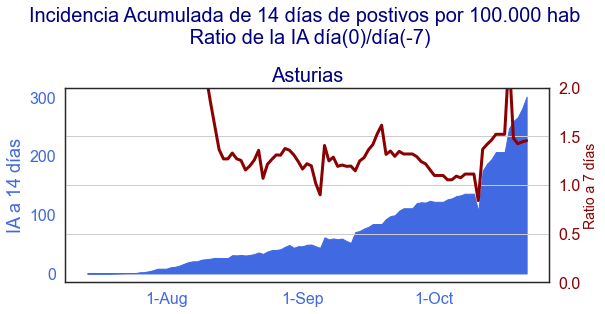

In [157]:
# Preparamos los datos

provincias=['Asturias']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_PCR_14='cases_PCR_14days'
casos_nuevos = 'PCR'
clave_casos_popu = 'casos_per_population'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días de postivos por 100.000 hab \n Ratio de la IA día(0)/día(-7)'
y1='IA a 14 días'
y2='Ratio a 7 días'
  
for provincia in provincias:
    
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie  

# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,5))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,1,1,)

#ax1.bar(datos['date'].unique(),datos[clave_casos_popu],color='red')
ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)

ax1.set_ylabel(y1,size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Asturias',size=20,color=color_titulos)
ax1.set_xlim()
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(0,2)

ax2.plot(datos['date'].unique(), datos[clave_ratio], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='both')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)
ax2.set_ylabel(y2,size=14,color=color_avg)
#ax4.set_yticks([])
ax2.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)

#f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
#       verticalalignment='center', fontsize=12,color=color_titulos)
#f.text(0.1,0.02,'#python code:{}'.format(github_url),
#           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_asturias.png',dpi=100)  
#plt.show()

# Cantabria

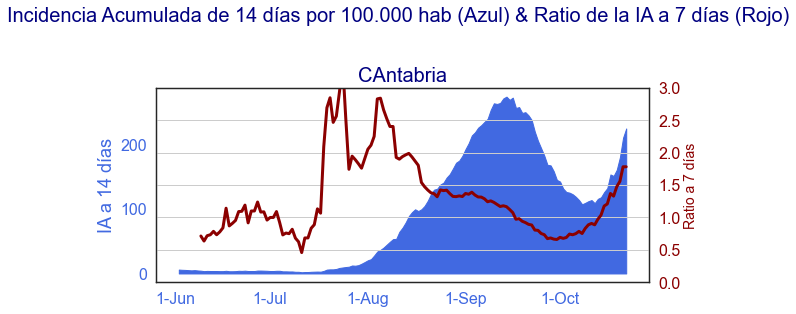

In [158]:
provincias=['Cantabria']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'

casos_nuevos = 'PCR'

ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) & Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'

for provincia in provincias:

    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    


# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,5))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,1,1,)

#ax1.bar(datos['date'].unique(),datos[clave_casos_popu],color='red')
ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)

ax1.set_ylabel(y1,size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('CAntabria',size=20,color=color_titulos)
ax1.set_xlim()
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(0,3)

ax2.plot(datos['date'].unique(), datos[clave_ratio], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='y')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)
ax2.set_ylabel(y2,size=14,color=color_avg)
#ax4.set_yticks([])
ax2.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)

#f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
#       verticalalignment='center', fontsize=12,color=color_titulos)
#f.text(0.1,0.02,'#python code:{}'.format(github_url),
#           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_cantabria.png',dpi=100)  
#plt.show()

# Cataluña

<Figure size 720x360 with 0 Axes>

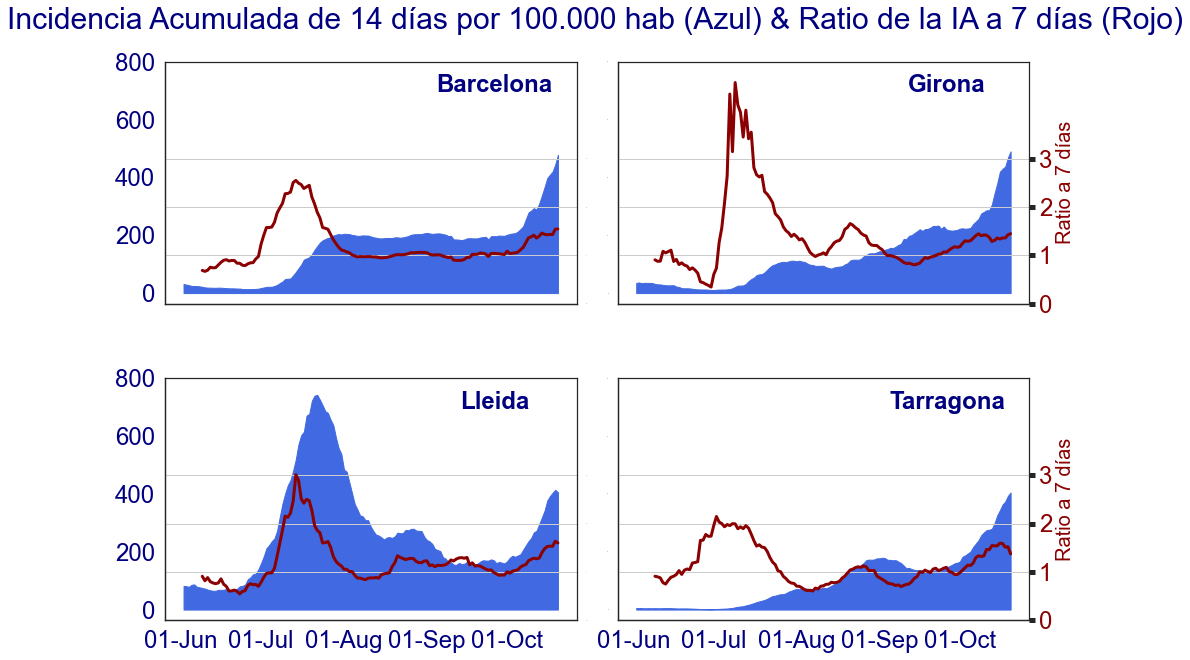

In [159]:
provincias=['Barcelona','Tarragona','Girona','Lleida']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='daily_cases'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) & Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'

for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    

f = plt.figure(figsize=(10,5))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province', margin_titles=False, col_wrap=2,aspect=1.5, 
                  height=5, palette=pal)
# Título
#g.fig.set_figwidth(20)
#g.fig.set_figheight(10)
g.fig.suptitle(titulo,fontsize=30,color=color_titulos)
#g.fig.text(0.1, 0.04, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
#       fontsize=24,color=color_titulos)

#g.fig.text(0.1,0.01,'Código:{}'.format(github_url),
#           fontsize=24,horizontalalignment='left',color=color_titulos)


XmajorFmt = DateFormatter('%d-%b')

g.map(plt.fill_between, 'date',AI,color=color_diarios)

ejes = g.axes

for i,ax in enumerate(ejes):
    #ax.set_title('')
    ax.xaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_titulos)
    ax.grid(False)
    lista_y = ax.get_yticks()
    ax.set_yticks([0,200,400,600,800])
    ax.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_titulos)
    ax.set_xlabel('')
    if i % 2 ==0:
        #ax.set_yticks([0,200,400,600,800])
        ax.yaxis.set_tick_params(labelsize=24,labelcolor=color_titulos)
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))
        ax.set_ylabel(y_IA,size=20,color=color_avg)
        
    
    ax2 = ax.twinx()
    ax2.grid(True)
    ax2.set_yticks([0,1,2,3])
    ax2.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_avg)
    ax2.set_ylim(0,5)
    ax2.plot(datos['date'].unique(), datos[datos['province'] == provincias[i]][clave_ratio], lw=3, color=color_avg)
    
    ax2.xaxis.set_major_formatter(XmajorFmt)
    ax2.xaxis.set_tick_params(labelsize=14,width=5,labelcolor=color_titulos)
    ax2.xaxis.set_major_locator(DayLocator([1]))
    ax2.set_xlabel('')
    ax2.set_title('')
    
    if i % 2 ==1:
        
        ax2.yaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_avg)
        #ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
        ax2.set_yticks([0,1,2,3])
        ax2.set_ylabel(y_ratio,size=20,color=color_avg)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    #ax.set_title('')
    #ax.set_suptitle('')
    ax.text(0.8, .9, label, fontweight="bold",
            ha="center", va="center", size=24,transform=ax.transAxes,color=color_titulos)
g.map(label,'province')


axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("")
#    ax.set_ylabel('')
g.set_titles('')




# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
#g.fig.subplots_adjust(hspace=0.1,wspace=.1)

plt.tight_layout(w_pad=1,h_pad=5,pad=5)
plt.savefig('graficos/pcr+_cataluña.png',dpi=100)  
plt.show()

# Castilla león

<Figure size 720x360 with 0 Axes>

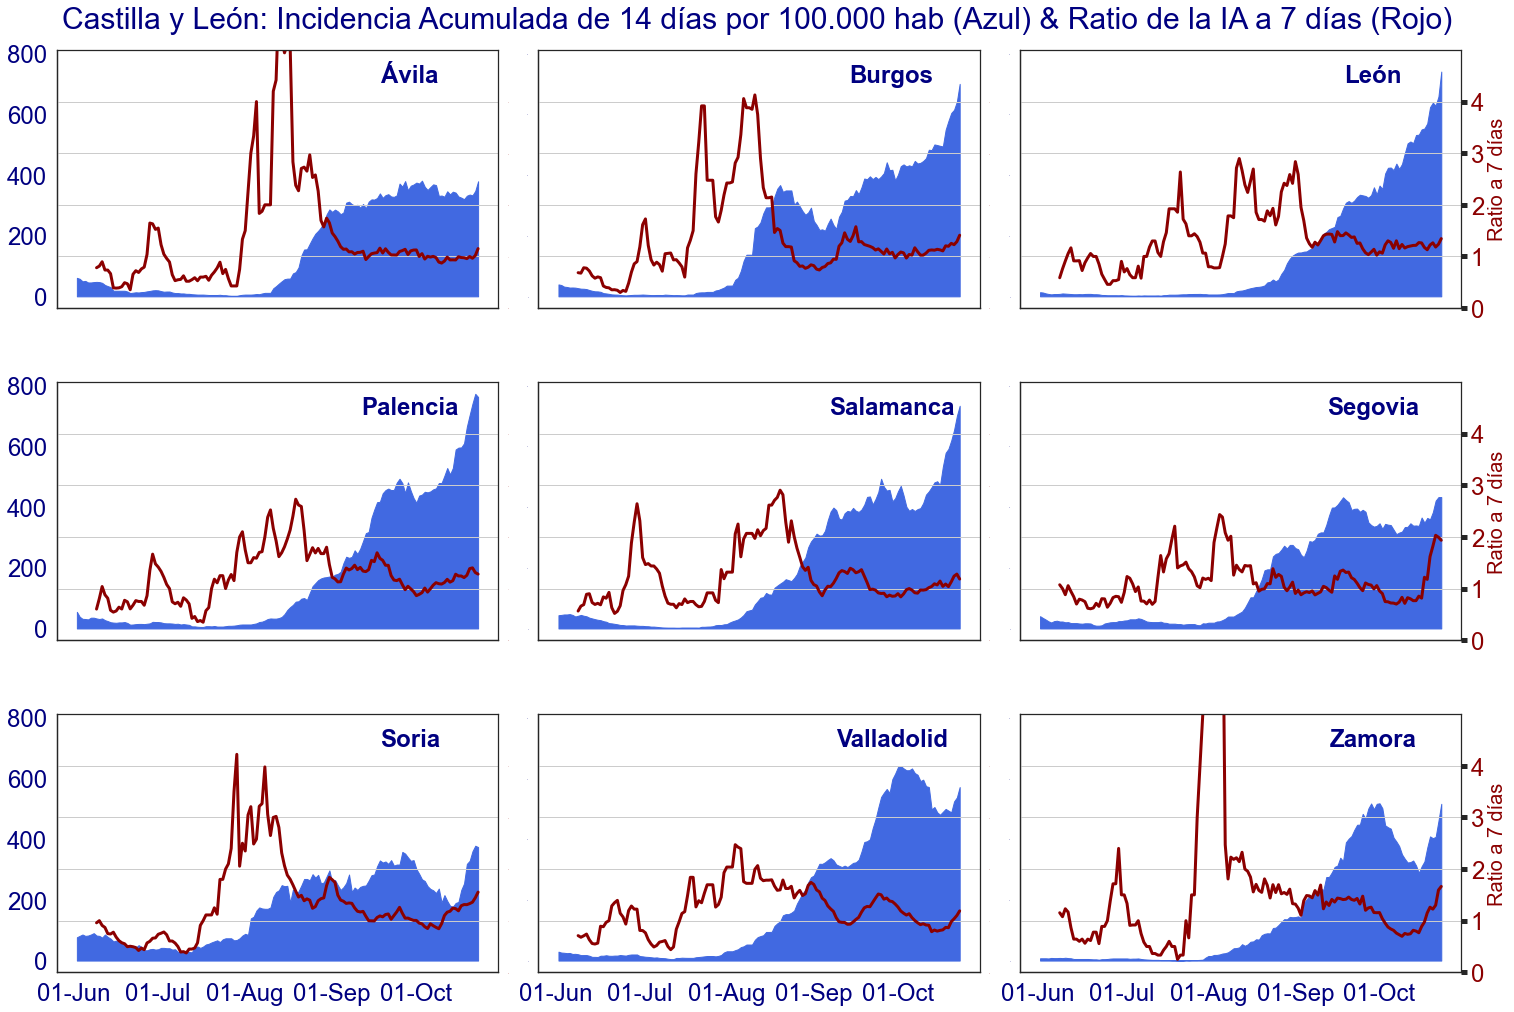

In [160]:
provincias=['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='daily_cases_PCR'
ventana_IA=14
titulo = 'Castilla y León: Incidencia Acumulada de 14 días por 100.000 hab (Azul) & Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'

for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    

f = plt.figure(figsize=(10,5))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province', margin_titles=False, col_wrap=3,aspect=1.5, 
                  height=5, palette=pal)
# Título
#g.fig.set_figwidth(20)
#g.fig.set_figheight(10)
g.fig.suptitle(titulo,fontsize=30,color=color_titulos)
#g.fig.text(0.1, 0.04, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
#       fontsize=24,color=color_titulos)

#g.fig.text(0.1,0.01,'Código:{}'.format(github_url),
#           fontsize=24,horizontalalignment='left',color=color_titulos)


XmajorFmt = DateFormatter('%d-%b')

g.map(plt.fill_between, 'date',AI,color=color_diarios)

ejes = g.axes

for i,ax in enumerate(ejes):
    #ax.set_title('')
    ax.xaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_titulos)
    ax.grid(False)
    lista_y = ax.get_yticks()
    ax.set_yticks([0,200,400,600,800])
    ax.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_titulos)
    ax.set_xlabel('')
    if i % 3 ==0:
        #ax.set_yticks([0,200,400,600,800])
        ax.yaxis.set_tick_params(labelsize=24,labelcolor=color_titulos)
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))
        ax.set_ylabel(y_IA,size=20,color=color_avg)
        
    
    ax2 = ax.twinx()
    ax2.grid(True)
    ax2.set_yticks([0,1,2,3,4])
    ax2.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_avg)
    ax2.set_ylim(0,5)
    ax2.plot(datos['date'].unique(), datos[datos['province'] == provincias[i]][clave_ratio], lw=3, color=color_avg)
    
    ax2.xaxis.set_major_formatter(XmajorFmt)
    ax2.xaxis.set_tick_params(labelsize=14,width=5,labelcolor=color_titulos)
    ax2.xaxis.set_major_locator(DayLocator([1]))
    ax2.set_xlabel('')
    ax2.set_title('')
    
    if i % 3 == 2:
        
        ax2.yaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_avg)
        #ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
        ax2.set_yticks([0,1,2,3,4])
        ax2.set_ylabel(y_ratio,size=20,color=color_avg)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    #ax.set_title('')
    #ax.set_suptitle('')
    ax.text(0.8, .9, label, fontweight="bold",
            ha="center", va="center", size=24,transform=ax.transAxes,color=color_titulos)
g.map(label,'province')


axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("")
#    ax.set_ylabel('')
g.set_titles('')




# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
#g.fig.subplots_adjust(hspace=0.1,wspace=.1)

plt.tight_layout(w_pad=1,h_pad=5,pad=5)
plt.savefig('graficos/pcr+_castilla_leon.png',dpi=100)  
plt.show()

# Castilla La Mancha

<Figure size 720x360 with 0 Axes>

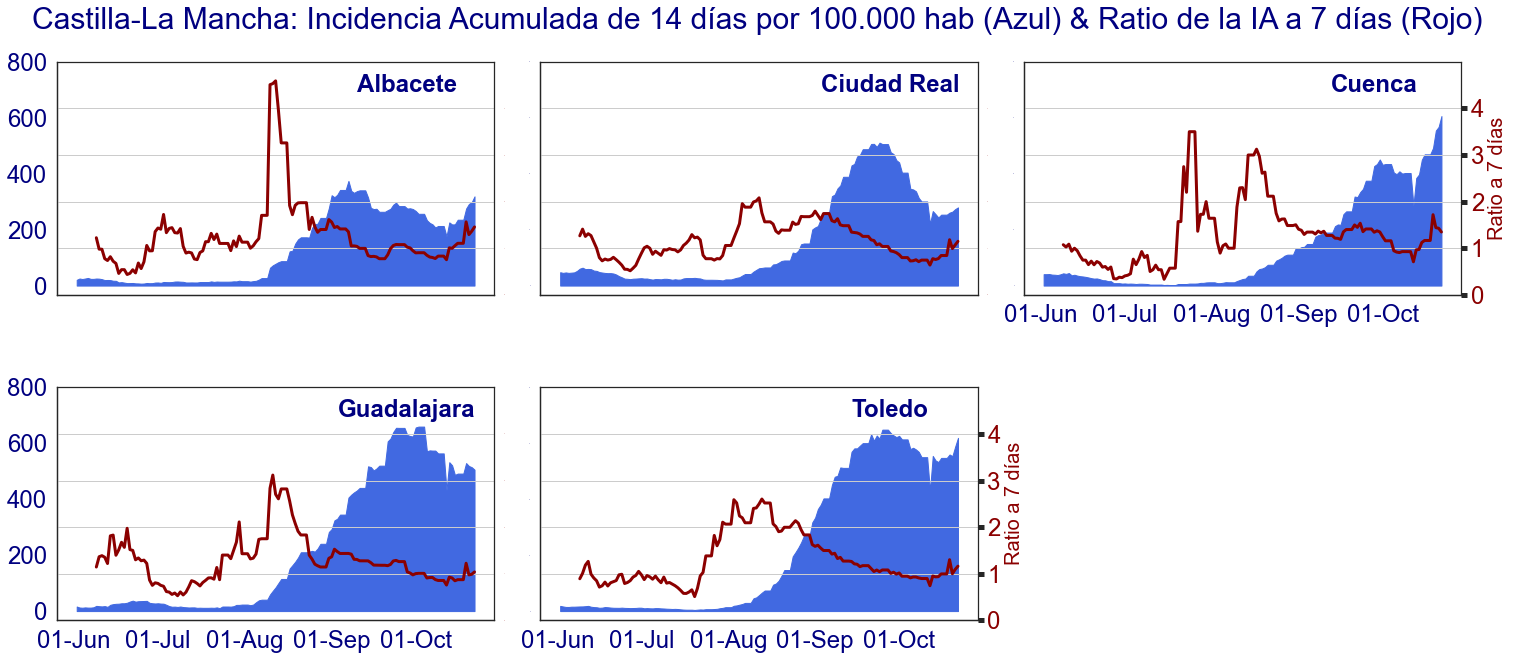

In [161]:
provincias=['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='daily_cases_PCR'
ventana_IA=14
titulo = 'Castilla-La Mancha: Incidencia Acumulada de 14 días por 100.000 hab (Azul) & Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'

for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    

f = plt.figure(figsize=(10,5))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province', margin_titles=False, col_wrap=3,aspect=1.5, 
                  height=5, palette=pal)
# Título
#g.fig.set_figwidth(20)
#g.fig.set_figheight(10)
g.fig.suptitle(titulo,fontsize=30,color=color_titulos)
#g.fig.text(0.1, 0.04, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
#       fontsize=24,color=color_titulos)

#g.fig.text(0.1,0.01,'Código:{}'.format(github_url),
#           fontsize=24,horizontalalignment='left',color=color_titulos)


XmajorFmt = DateFormatter('%d-%b')

g.map(plt.fill_between, 'date',AI,color=color_diarios)

ejes = g.axes

for i,ax in enumerate(ejes):
    #ax.set_title('')
    ax.xaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_titulos)
    ax.grid(False)
    lista_y = ax.get_yticks()
    ax.set_yticks([0,200,400,600,800])
    ax.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_titulos)
    ax.set_xlabel('')
    if i % 3 ==0:
        #ax.set_yticks([0,200,400,600,800])
        ax.yaxis.set_tick_params(labelsize=24,labelcolor=color_titulos)
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))
        ax.set_ylabel(y_IA,size=20,color=color_avg)
        
    
    ax2 = ax.twinx()
    ax2.grid(True)
    ax2.set_yticks([0,1,2,3,4])
    ax2.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_avg)
    ax2.set_ylim(0,5)
    ax2.plot(datos['date'].unique(), datos[datos['province'] == provincias[i]][clave_ratio], lw=3, color=color_avg)
    
    ax2.xaxis.set_major_formatter(XmajorFmt)
    ax2.xaxis.set_tick_params(labelsize=14,width=5,labelcolor=color_titulos)
    ax2.xaxis.set_major_locator(DayLocator([1]))
    ax2.set_xlabel('')
    ax2.set_title('')
    
    if i % 3 == 2 or i == 4:
        
        ax2.yaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_avg)
        #ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
        ax2.set_yticks([0,1,2,3,4])
        ax2.set_ylabel(y_ratio,size=20,color=color_avg)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    #ax.set_title('')
    #ax.set_suptitle('')
    ax.text(0.8, .9, label, fontweight="bold",
            ha="center", va="center", size=24,transform=ax.transAxes,color=color_titulos)
g.map(label,'province')


axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("")
#    ax.set_ylabel('')
g.set_titles('')




# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=0)

plt.tight_layout(w_pad=0,h_pad=5,pad=5)
plt.savefig('graficos/pcr+_castilla_lamancha.png',dpi=100)  
plt.show()

# Extremadura

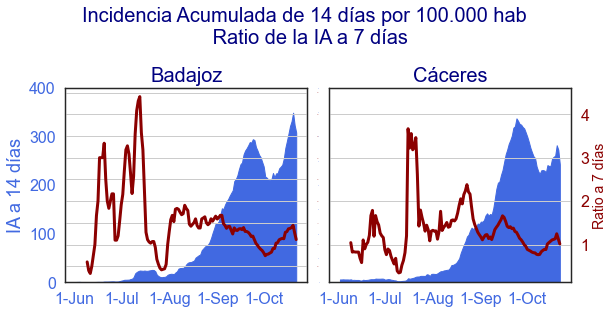

In [162]:
# Preparamos los datos

provincias=['Badajoz','Cáceres']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='new_cases'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab \n Ratio de la IA a 7 días'
y1='IA a 14 días'
y2='Ratio a 7 días'

for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    

#preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,5))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,2,1,)
ax1.fill_between(datos['date'].unique(), datos[datos['province'] == 'Badajoz'][AI],color=color_diarios)
ax1.set_ylabel(y1,size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Badajoz',size=20,color=color_titulos)
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax1.set_ylim(0,400)

ax2.plot(datos['date'].unique(), datos[datos['province'] == 'Badajoz'][clave_ratio], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='both')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)


ax3 = f.add_subplot(1,2,2)

ax3.fill_between(datos['date'].unique(), datos[datos['province'] == 'Cáceres'][AI],color=color_diarios)

ax3.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax3.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_diarios)
#ax3.set_yticks([])
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax3.set_title('Cáceres',size=20,color=color_titulos)
ax3.set_ylim(ax1.get_ylim())
#ax3.set_yticks(ax1.get_yticks())


ax4 = ax3.twinx()
ax4.grid(True,axis='both')
ax4.set_ylim(ax2.get_ylim())

ax4.plot(datos['date'].unique(), datos[datos['province'] == 'Cáceres'][clave_ratio], lw=3, color=color_avg)
ax4.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax4.xaxis.set_major_formatter(majorFmt)
ax4.set_ylabel(y2,size=14,color=color_avg)
#ax4.set_yticks([])
ax4.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)

#f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
#       verticalalignment='center', fontsize=12,color=color_titulos)
#f.text(0.1,0.02,'#python code:{}'.format(github_url),
#           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+_extremadura.png',dpi=100)  
#plt.show()

# Galicia

<Figure size 720x360 with 0 Axes>

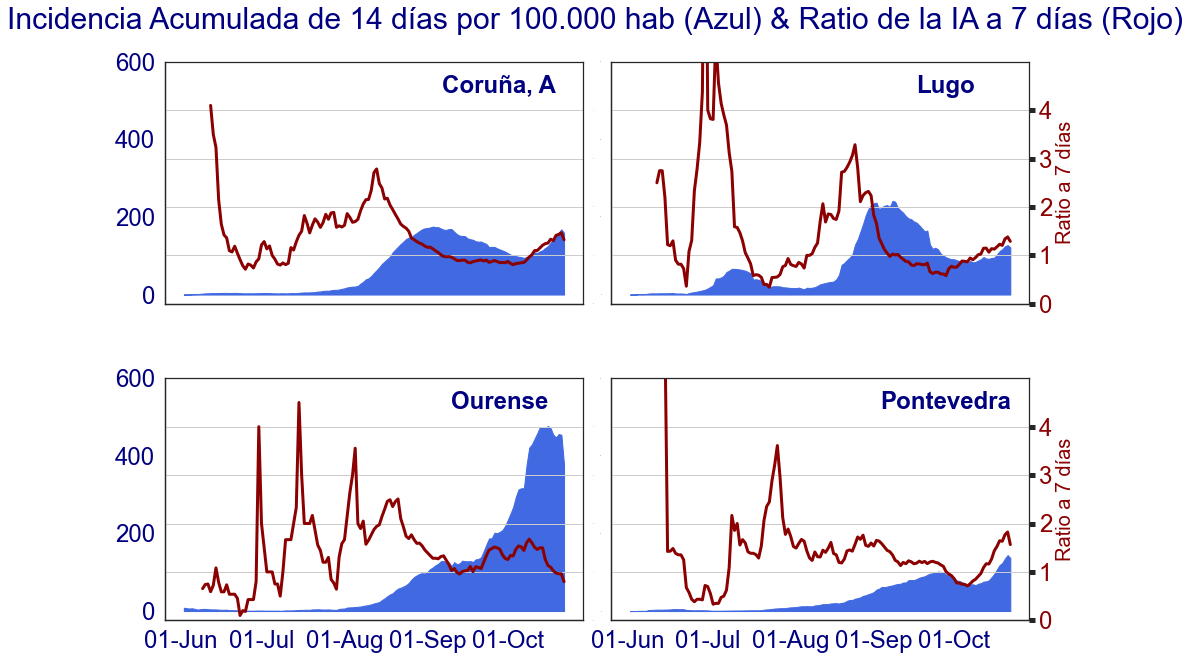

In [163]:
provincias=['Coruña, A','Lugo','Ourense','Pontevedra']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='daily_cases'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) & Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'

for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    

f = plt.figure(figsize=(10,5))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province', margin_titles=False, col_wrap=2,aspect=1.5, 
                  height=5, palette=pal)
# Título
#g.fig.set_figwidth(20)
#g.fig.set_figheight(10)
g.fig.suptitle(titulo,fontsize=30,color=color_titulos)
#g.fig.text(0.1, 0.04, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
#       fontsize=24,color=color_titulos)

#g.fig.text(0.1,0.01,'Código:{}'.format(github_url),
#           fontsize=24,horizontalalignment='left',color=color_titulos)


XmajorFmt = DateFormatter('%d-%b')

g.map(plt.fill_between, 'date',AI,color=color_diarios)

ejes = g.axes

for i,ax in enumerate(ejes):
    #ax.set_title('')
    ax.xaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_titulos)
    ax.grid(False)
    lista_y = ax.get_yticks()
    ax.set_yticks([0,200,400,600])
    ax.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_titulos)
    ax.set_xlabel('')
    if i % 2 ==0:
        #ax.set_yticks([0,200,400,600,800])
        ax.yaxis.set_tick_params(labelsize=24,labelcolor=color_titulos)
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))
        ax.set_ylabel(y_IA,size=20,color=color_avg)
        
    
    ax2 = ax.twinx()
    ax2.grid(True)
    ax2.set_yticks([0,1,2,3,4])
    ax2.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_avg)
    ax2.set_ylim(0,5)
    ax2.plot(datos['date'].unique(), datos[datos['province'] == provincias[i]][clave_ratio], lw=3, color=color_avg)
    
    ax2.xaxis.set_major_formatter(XmajorFmt)
    ax2.xaxis.set_tick_params(labelsize=14,width=5,labelcolor=color_titulos)
    ax2.xaxis.set_major_locator(DayLocator([1]))
    ax2.set_xlabel('')
    ax2.set_title('')
    
    if i % 2 == 1:
        
        ax2.yaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_avg)
        #ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
        #ax2.set_yticks([0,1,2,3,4])
        ax2.set_ylabel(y_ratio,size=20,color=color_avg)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    #ax.set_title('')
    #ax.set_suptitle('')
    ax.text(0.8, .9, label, fontweight="bold",
            ha="center", va="center", size=24,transform=ax.transAxes,color=color_titulos)
g.map(label,'province')


axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("")
#    ax.set_ylabel('')
g.set_titles('')




# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=0)

plt.tight_layout(w_pad=0,h_pad=5,pad=5)
plt.savefig('graficos/pcr+_galicia.png',dpi=100)  
plt.show()

# Islas Baleares

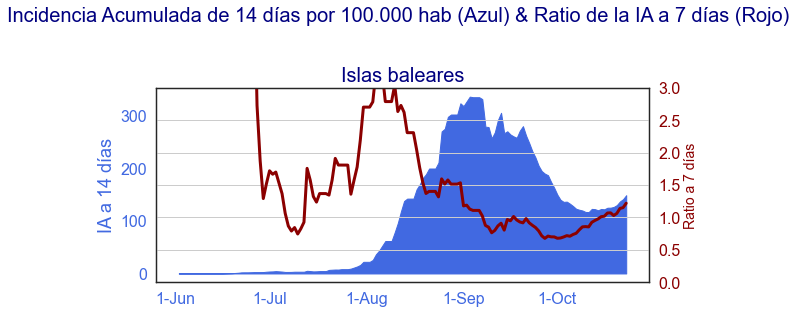

In [164]:
provincias=['Balears, Illes']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'

casos_nuevos = 'PCR'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) & Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'

for provincia in provincias:
    
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    


# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,5))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,1,1,)

#ax1.bar(datos['date'].unique(),datos[clave_casos_popu],color='red')
ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)

ax1.set_ylabel(y1,size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Islas baleares',size=20,color=color_titulos)
ax1.set_xlim()
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(0,3)

ax2.plot(datos['date'].unique(), datos[clave_ratio], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='y')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)
ax2.set_ylabel(y2,size=14,color=color_avg)
#ax4.set_yticks([])
ax2.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)

#f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
#       verticalalignment='center', fontsize=12,color=color_titulos)
#f.text(0.1,0.02,'#python code:{}'.format(github_url),
#           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_baleares.png',dpi=100)  
#plt.show()

# Islas Canarias

<Figure size 720x360 with 0 Axes>

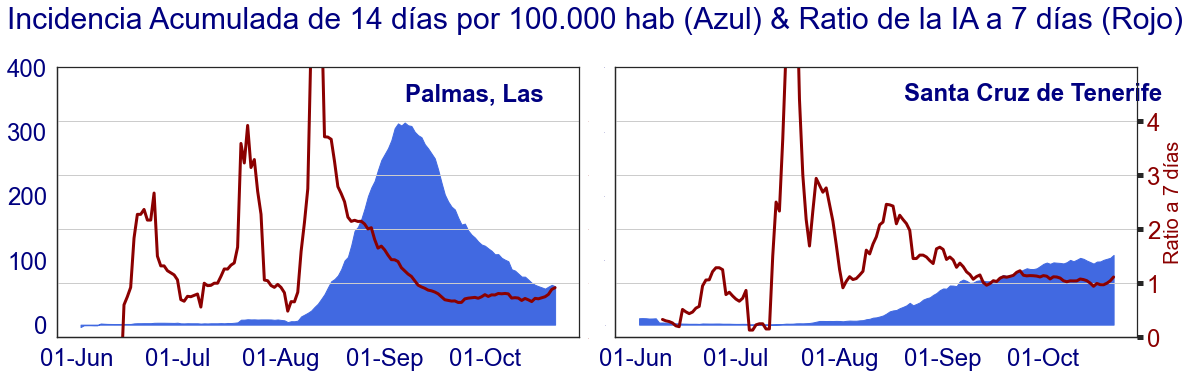

In [165]:
provincias=['Palmas, Las', 'Santa Cruz de Tenerife']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='daily_cases'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) & Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'

for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    

f = plt.figure(figsize=(10,5))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province', margin_titles=False, col_wrap=2,aspect=1.5, 
                  height=6, palette=pal)
# Título
#g.fig.set_figwidth(20)
#g.fig.set_figheight(10)
g.fig.suptitle(titulo,fontsize=30,color=color_titulos)
#g.fig.text(0.1, 0.04, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
#       fontsize=24,color=color_titulos)

#g.fig.text(0.1,0.01,'Código:{}'.format(github_url),
#           fontsize=24,horizontalalignment='left',color=color_titulos)


XmajorFmt = DateFormatter('%d-%b')

g.map(plt.fill_between, 'date',AI,color=color_diarios)

ejes = g.axes

for i,ax in enumerate(ejes):
    #ax.set_title('')
    ax.xaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_titulos)
    ax.grid(False)
    lista_y = ax.get_yticks()
    ax.set_yticks([0,100,200,300,400])
    ax.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_titulos)
    ax.set_xlabel('')
    if i % 2 ==0:
        #ax.set_yticks([0,200,400,600,800])
        ax.yaxis.set_tick_params(labelsize=24,labelcolor=color_titulos)
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))
        ax.set_ylabel(y_IA,size=20,color=color_avg)
        
    
    ax2 = ax.twinx()
    ax2.grid(True)
    ax2.set_yticks([0,1,2,3,4])
    ax2.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_avg)
    ax2.set_ylim(0,5)
    ax2.plot(datos['date'].unique(), datos[datos['province'] == provincias[i]][clave_ratio], lw=3, color=color_avg)
    
    ax2.xaxis.set_major_formatter(XmajorFmt)
    ax2.xaxis.set_tick_params(labelsize=14,width=5,labelcolor=color_titulos)
    ax2.xaxis.set_major_locator(DayLocator([1]))
    ax2.set_xlabel('')
    ax2.set_title('')
    
    if i % 2 ==1:
        
        ax2.yaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_avg)
        #ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
        
        ax2.set_ylabel(y_ratio,size=20,color=color_avg)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    #ax.set_title('')
    #ax.set_suptitle('')
    ax.text(0.8, .9, label, fontweight="bold",
            ha="center", va="center", size=24,transform=ax.transAxes,color=color_titulos)
g.map(label,'province')


axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("")
#    ax.set_ylabel('')
g.set_titles('')




# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
#g.fig.subplots_adjust(hspace=0.1,wspace=.1)

plt.tight_layout(w_pad=1,h_pad=5,pad=5)
plt.savefig('graficos/pcr+_canarias.png',dpi=100)  
plt.show()

# Ceuta

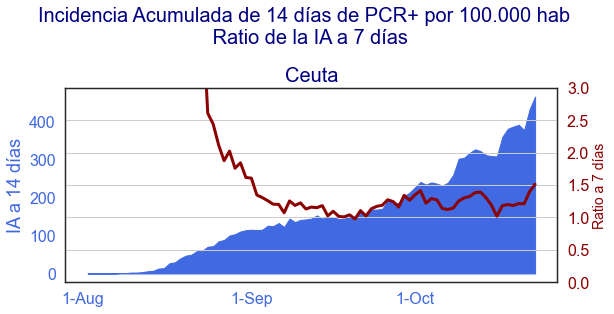

In [166]:
# Preparamos los datos

provincias=['Ceuta']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_PCR_14='cases_PCR_14days'
casos_nuevos = 'new_cases'
#casos_nuevos = 'num_casos'
clave_casos_popu = 'casos_per_population'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días de PCR+ por 100.000 hab \n Ratio de la IA a 7 días'
y1='IA a 14 días'
y2='Ratio a 7 días'
  
for provincia in provincias:
   
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    
# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,5))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,1,1,)

#ax1.bar(datos['date'].unique(),datos[clave_casos_popu],color='red')
ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)

ax1.set_ylabel(y1,size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Ceuta',size=20,color=color_titulos)
ax1.set_xlim()
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(0,3)

ax2.plot(datos['date'].unique(), datos[clave_ratio], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='y')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)
ax2.set_ylabel(y2,size=14,color=color_avg)
#ax4.set_yticks([])
ax2.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)

#f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
#       verticalalignment='center', fontsize=12,color=color_titulos)
#f.text(0.1,0.02,'#python code:{}'.format(github_url),
#           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_ceuta.png',dpi=100)  
#plt.show()

# Melilla

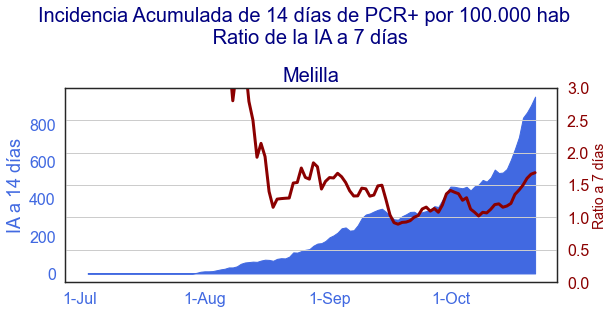

In [167]:
# Preparamos los datos

provincias=['Melilla']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_PCR_14='cases_PCR_14days'
casos_nuevos = 'PCR'

#casos_nuevos = 'num_casos'
clave_casos_popu = 'casos_per_population'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días de PCR+ por 100.000 hab \n Ratio de la IA a 7 días'
y1='IA a 14 días'
y2='Ratio a 7 días'
  
for provincia in provincias:
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    

# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,5))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,1,1,)

#ax1.bar(datos['date'].unique(),datos[clave_casos_popu],color='red')
ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)

ax1.set_ylabel(y1,size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Melilla',size=20,color=color_titulos)
ax1.set_xlim()
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(0,3)

ax2.plot(datos['date'].unique(), datos[clave_ratio], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='y')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)
ax2.set_ylabel(y2,size=14,color=color_avg)
#ax4.set_yticks([])
ax2.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)

#f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
#       verticalalignment='center', fontsize=12,color=color_titulos)
#f.text(0.1,0.02,'#python code:{}'.format(github_url),
#           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_melilla.png',dpi=100)  
#plt.show()

# Navarra

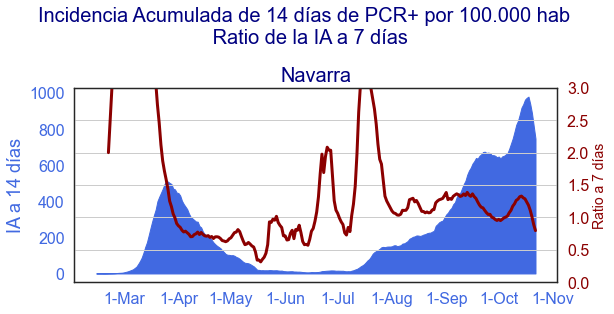

In [168]:
# Preparamos los datos

provincias=['Navarra']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=2,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_PCR_14='cases_PCR_14days'
casos_nuevos = 'num_casos'

#casos_nuevos = 'num_casos'
clave_casos_popu = 'casos_per_population'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días de PCR+ por 100.000 hab \n Ratio de la IA a 7 días'
y1='IA a 14 días'
y2='Ratio a 7 días'
  
for provincia in provincias:
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    

# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,5))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,1,1,)

#ax1.bar(datos['date'].unique(),datos[clave_casos_popu],color='red')
ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)

ax1.set_ylabel(y1,size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Navarra',size=20,color=color_titulos)
ax1.set_xlim()
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(0,3)

ax2.plot(datos['date'].unique(), datos[clave_ratio], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='y')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)
ax2.set_ylabel(y2,size=14,color=color_avg)
#ax4.set_yticks([])
ax2.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)

#f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
#       verticalalignment='center', fontsize=12,color=color_titulos)
#f.text(0.1,0.02,'#python code:{}'.format(github_url),
#           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_navarra.png',dpi=100)  
#plt.show()

# País Vasco

<Figure size 720x360 with 0 Axes>

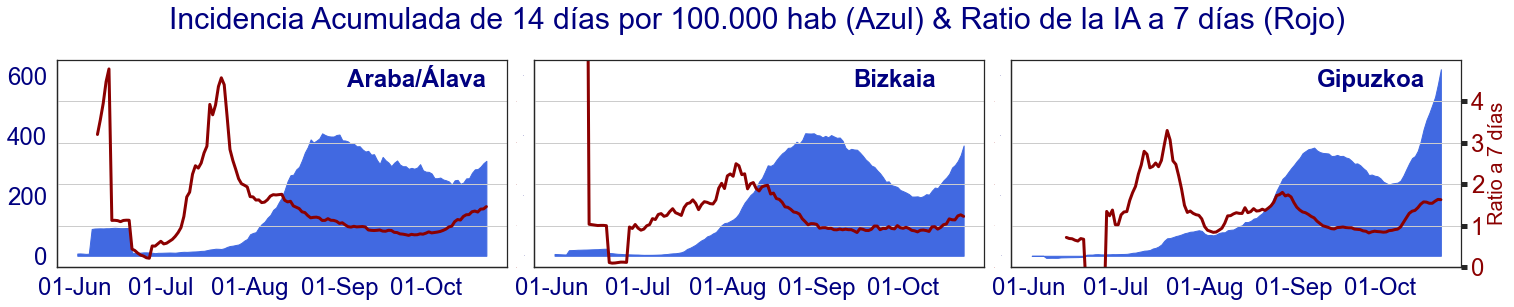

In [169]:
provincias=['Bizkaia','Araba/Álava','Gipuzkoa']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='daily_cases_PCR'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) & Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'

for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    

f = plt.figure(figsize=(10,5))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province', margin_titles=False, col_wrap=3,aspect=1.5, 
                  height=5, palette=pal)
# Título
#g.fig.set_figwidth(20)
#g.fig.set_figheight(10)
g.fig.suptitle(titulo,fontsize=30,color=color_titulos)
#g.fig.text(0.1, 0.04, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
#       fontsize=24,color=color_titulos)

#g.fig.text(0.1,0.01,'Código:{}'.format(github_url),
#           fontsize=24,horizontalalignment='left',color=color_titulos)


XmajorFmt = DateFormatter('%d-%b')

g.map(plt.fill_between, 'date',AI,color=color_diarios)

ejes = g.axes

for i,ax in enumerate(ejes):
    #ax.set_title('')
    ax.xaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_titulos)
    ax.grid(False)
    lista_y = ax.get_yticks()
    ax.set_yticks([0,200,400,600])
    ax.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_titulos)
    ax.set_xlabel('')
    if i % 3 ==0:
        #ax.set_yticks([0,200,400,600,800])
        ax.yaxis.set_tick_params(labelsize=24,labelcolor=color_titulos)
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))
        ax.set_ylabel(y_IA,size=20,color=color_avg)
        
    
    ax2 = ax.twinx()
    ax2.grid(True)
    ax2.set_yticks([0,1,2,3,4])
    ax2.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_avg)
    ax2.set_ylim(0,5)
    ax2.plot(datos['date'].unique(), datos[datos['province'] == provincias[i]][clave_ratio], lw=3, color=color_avg)
    
    ax2.xaxis.set_major_formatter(XmajorFmt)
    ax2.xaxis.set_tick_params(labelsize=14,width=5,labelcolor=color_titulos)
    ax2.xaxis.set_major_locator(DayLocator([1]))
    ax2.set_xlabel('')
    ax2.set_title('')
    
    if i % 3 == 2:
        
        ax2.yaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_avg)
        #ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
        #ax2.set_yticks([0,1,2,3,4])
        ax2.set_ylabel(y_ratio,size=20,color=color_avg)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    #ax.set_title('')
    #ax.set_suptitle('')
    ax.text(0.8, .9, label, fontweight="bold",
            ha="center", va="center", size=24,transform=ax.transAxes,color=color_titulos)
g.map(label,'province')


axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("")
#    ax.set_ylabel('')
g.set_titles('')




# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=0)

plt.tight_layout(w_pad=0,h_pad=5,pad=5)
plt.savefig('graficos/pcr+_paisvasco.png',dpi=100)  
plt.show()

# La Rioja

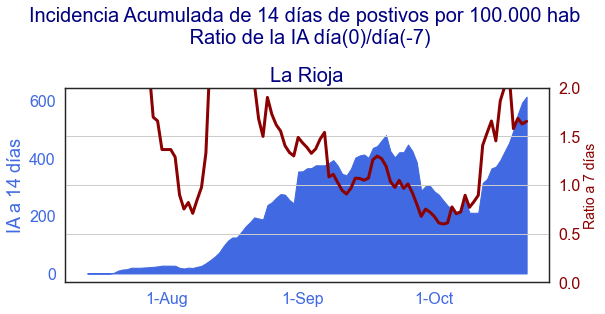

In [170]:
# Preparamos los datos

provincias=['Rioja, La']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_PCR_14='cases_PCR_14days'
casos_nuevos = 'PCR'
clave_casos_popu = 'casos_per_population'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días de postivos por 100.000 hab \n Ratio de la IA día(0)/día(-7)'
y1='IA a 14 días'
y2='Ratio a 7 días'
  
for provincia in provincias:
    
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie  

# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,5))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,1,1,)

#ax1.bar(datos['date'].unique(),datos[clave_casos_popu],color='red')
ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)

ax1.set_ylabel(y1,size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('La Rioja',size=20,color=color_titulos)
ax1.set_xlim()
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(0,2)

ax2.plot(datos['date'].unique(), datos[clave_ratio], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='both')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)
ax2.set_ylabel(y2,size=14,color=color_avg)
#ax4.set_yticks([])
ax2.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)

#f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
#       verticalalignment='center', fontsize=12,color=color_titulos)
#f.text(0.1,0.02,'#python code:{}'.format(github_url),
#           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_lariojaa.png',dpi=100)  
#plt.show()

# Valencia

<Figure size 720x360 with 0 Axes>

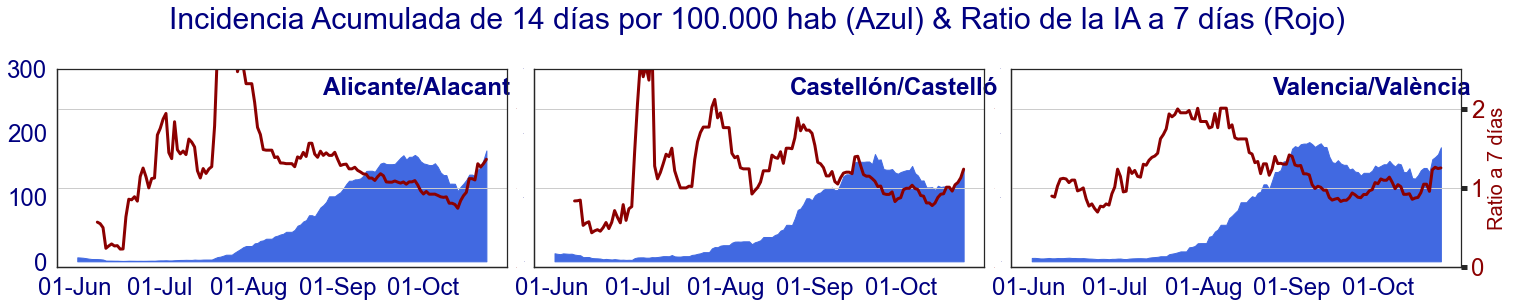

In [171]:
provincias=['Alicante/Alacant','Castellón/Castelló', 'Valencia/València']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos_1 = 'PCR'
casos_nuevos_2 = 'new_cases'
casos_nuevos = 'casos_nuevos'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) & Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'

for provincia in provincias:
    datos.loc[datos['province']==provincia,casos_nuevos] = \
    datos.loc[datos['province']==provincia,casos_nuevos_1]+\
    datos.loc[datos['province']==provincia,casos_nuevos_2]
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    

f = plt.figure(figsize=(10,5))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province', margin_titles=False, col_wrap=3,aspect=1.5, 
                  height=5, palette=pal)
# Título
#g.fig.set_figwidth(20)
#g.fig.set_figheight(10)
g.fig.suptitle(titulo,fontsize=30,color=color_titulos)
#g.fig.text(0.1, 0.04, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
#       fontsize=24,color=color_titulos)

#g.fig.text(0.1,0.01,'Código:{}'.format(github_url),
#           fontsize=24,horizontalalignment='left',color=color_titulos)


XmajorFmt = DateFormatter('%d-%b')

g.map(plt.fill_between, 'date',AI,color=color_diarios)

ejes = g.axes

for i,ax in enumerate(ejes):
    #ax.set_title('')
    ax.xaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_titulos)
    ax.grid(False)
    lista_y = ax.get_yticks()
    ax.set_yticks([0,100,200,300])
    ax.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_titulos)
    ax.set_xlabel('')
    if i % 3 ==0:
        #ax.set_yticks([0,200,400,600,800])
        ax.yaxis.set_tick_params(labelsize=24,labelcolor=color_titulos)
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))
        ax.set_ylabel(y_IA,size=20,color=color_avg)
        
    
    ax2 = ax.twinx()
    ax2.grid(True)
    ax2.set_yticks([0,1,2])
    ax2.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_avg)
    ax2.set_ylim(0,2.5)
    ax2.plot(datos['date'].unique(), datos[datos['province'] == provincias[i]][clave_ratio], lw=3, color=color_avg)
    
    ax2.xaxis.set_major_formatter(XmajorFmt)
    ax2.xaxis.set_tick_params(labelsize=14,width=5,labelcolor=color_titulos)
    ax2.xaxis.set_major_locator(DayLocator([1]))
    ax2.set_xlabel('')
    ax2.set_title('')
    
    if i % 3 == 2:
        
        ax2.yaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_avg)
        #ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
        #ax2.set_yticks([0,1,2,3,4])
        ax2.set_ylabel(y_ratio,size=20,color=color_avg)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    #ax.set_title('')
    #ax.set_suptitle('')
    ax.text(0.8, .9, label, fontweight="bold",
            ha="center", va="center", size=24,transform=ax.transAxes,color=color_titulos)
g.map(label,'province')


axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("")
#    ax.set_ylabel('')
g.set_titles('')




# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=0)

plt.tight_layout(w_pad=0,h_pad=5,pad=5)
plt.savefig('graficos/pcr+_valencia.png',dpi=100)  
plt.show()

# Murcia

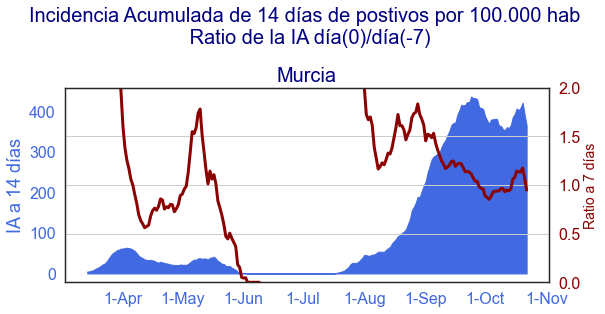

In [172]:
# Preparamos los datos

provincias=['Murcia']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_PCR_14='cases_PCR_14days'
casos_nuevos = 'daily_cases'
clave_casos_popu = 'casos_per_population'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días de postivos por 100.000 hab \n Ratio de la IA día(0)/día(-7)'
y1='IA a 14 días'
y2='Ratio a 7 días'
  
for provincia in provincias:
    
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie  

# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,5))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,1,1,)

#ax1.bar(datos['date'].unique(),datos[clave_casos_popu],color='red')
ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)

ax1.set_ylabel(y1,size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Murcia',size=20,color=color_titulos)
ax1.set_xlim()
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(0,2)

ax2.plot(datos['date'].unique(), datos[clave_ratio], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='both')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)
ax2.set_ylabel(y2,size=14,color=color_avg)
#ax4.set_yticks([])
ax2.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)

#f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
#       verticalalignment='center', fontsize=12,color=color_titulos)
#f.text(0.1,0.02,'#python code:{}'.format(github_url),
#           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_murcia.png',dpi=100)  
#plt.show()

# Madrid

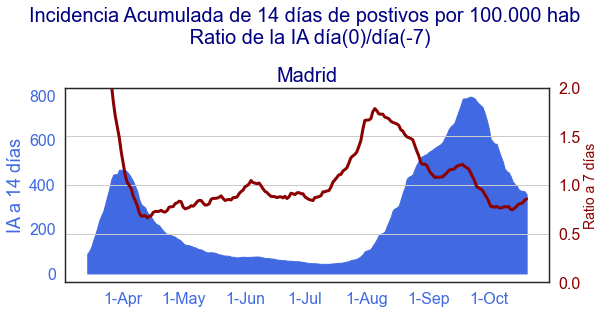

In [173]:
# Preparamos los datos

provincias=['Madrid']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_PCR_14='cases_PCR_14days'
casos_nuevos = 'daily_cases_PCR'
clave_casos_popu = 'casos_per_population'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días de postivos por 100.000 hab \n Ratio de la IA día(0)/día(-7)'
y1='IA a 14 días'
y2='Ratio a 7 días'
  
for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_nuevos].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie    
    

# preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,5))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)

ax1 = f.add_subplot(1,1,1,)

#ax1.bar(datos['date'].unique(),datos[clave_casos_popu],color='red')
ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)

ax1.set_ylabel(y1,size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Madrid',size=20,color=color_titulos)
ax1.set_xlim()
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(0,2)

ax2.plot(datos['date'].unique(), datos[clave_ratio], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
#ax2.set_yticks([])
ax2.grid(True,axis='both')
ax2.yaxis.set_tick_params(labelsize=0,labelcolor=color_avg,width=0)
ax2.set_ylabel(y2,size=14,color=color_avg)
#ax4.set_yticks([])
ax2.yaxis.set_tick_params(labelsize=16,labelcolor=color_avg,width=0)

#f.text(0.1, 0.1, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
#       verticalalignment='center', fontsize=12,color=color_titulos)
#f.text(0.1,0.02,'#python code:{}'.format(github_url),
#           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_madrid.png',dpi=100)  
#plt.show()

In [ ]:
# Preparamos los datos

provincias=['Madrid']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]


color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'

hospital='hospitalized'
hospital_per ='hospitalized_cienmil'
hosp_casos = 'hosp_per_casos'
UCI = 'intensive_care'
UCI_per = 'UCI_per'
UCI_casos = 'UCI_per_casos'
UCI_hosp = 'UCI_per_hosp'
muertes = 'daily_deaths'
muertes_acum_per = 'muertes_per_poblacion'
muertes_casos = ' muertes_per_casos'
muertes_avg = 'daily_deaths_avg7'
muertes_hosp = 'muertes_hosp'
casos_avg='daily_cases_PCR_avg7'

ventana_IA=14
titulo = 'Evolución hospitalizados por cienmil \n UCI´s y fallecidos por hospitalizados'
y1='IA a 14 días'
y2='Ratio a 7 días'
  
datos.loc[6426]
    
for provincia in provincias:
    
    

    datos.loc[datos['province']==provincia,hospital_per] = \
    datos.loc[datos['province']==provincia,hospital].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,'poblacion']*100000
    
    datos.loc[datos['province']==provincia,UCI_hosp]=\
    datos.loc[datos['province']==provincia,UCI].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,hospital]
    
    datos.loc[datos['province']==provincia,muertes_hosp]=\
    datos.loc[datos['province']==provincia,muertes_avg]\
    /datos.loc[datos['province']==provincia,hospital]
    
    # preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,15))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
claves=[hospital_per,UCI_hosp,muertes_hosp]

for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    axe.plot(datos['date'].unique(), datos[clave], lw=3, color='b')
    axe.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
    axe.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
    axe.set_title(clave,size=20,color=color_titulos)
    axe.grid(True)
    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    #axe.set_ylim(0,12)

f.text(0.1, 0.0, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
       verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.1,0.01,'#python code:{}'.format(github_url),
           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_madrid.png',dpi=100)  
#plt.show()

In [ ]:
# Preparamos los datos

### Nueva gráfica con uci y deaths

provincias=['Madrid']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]


color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'

hospital='hospitalized'
hospital_per ='hospitalized_cienmil'
hosp_casos = 'hosp_per_casos'
UCI = 'intensive_care'
UCI_per = 'intensive_care_per1000000'
UCI_casos = 'UCI_per_casos'
UCI_hosp = 'UCI_per_hosp'
muertes = 'daily_deaths'
muertes_acum_per = 'muertes_per_poblacion'
muertes_casos = ' muertes_per_casos'
muertes_avg = 'daily_deaths_avg7'
muertes_hosp = 'muertes_hosp'
casos_avg='daily_cases_PCR_avg7'

ventana_IA=14
titulo = 'Madrid: Evolución hospitalizados \n UCI´s y fallecidos'
y1='IA a 14 días'
y2='Ratio a 7 días'
  

    
for provincia in provincias:
    
    

    datos.loc[datos['province']==provincia,hospital_per] = \
    datos.loc[datos['province']==provincia,hospital].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,'poblacion']*100000
    
    datos.loc[datos['province']==provincia,UCI_hosp]=\
    datos.loc[datos['province']==provincia,UCI].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,hospital]
    
    
    
    # preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,15))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
claves=[hospital,UCI,muertes]
#nombres_claves={hospital:'hospitalizados',UCI:'UCI',muertes:'Fallecimientos'}

for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    axe.plot(datos['date'].unique(), datos[clave].rolling(window=7).mean(), lw=3, color='b')
    axe.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
    axe.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
    axe.set_title(clave,size=20,color=color_titulos)
    axe.grid(True)
    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    #axe.set_ylim(0,12)

f.text(0.1, 0.0, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
       verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.1,0.01,'#python code:{}'.format(github_url),
           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_madrid.png',dpi=100)  
#plt.show()

In [ ]:
# Preparamos los datos

provincias=['Madrid']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]


color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'

hospital='hospitalized'
hospital_per ='hospitalized_cienmil'
hosp_casos = 'hosp_per_casos'
UCI = 'intensive_care'
UCI_per = 'UCI_per'
UCI_casos = 'UCI_per_casos'
muertes = 'daily_deaths'
muertes_acum_per = 'muertes_per_poblacion'
muertes_casos = ' muertes_per_casos'
muertes_avg = 'daily_deaths_avg7'
casos_avg='daily_cases_PCR_avg7'

ventana_IA=14
titulo = 'Evolución hospitalizados, UCI´s y fallecidos por media 7 días de casos positivos'
y1='IA a 14 días'
y2='Ratio a 7 días'
  
datos.loc[6426]
    
for provincia in provincias:
    
    datos.loc[datos['province']==provincia,muertes_acum_per]=\
    datos.loc[datos['province']==provincia,muertes].cumsum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    datos.loc[datos['province']==provincia,hospital_per] = \
    datos.loc[datos['province']==provincia,hospital].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,'poblacion']*100000
    
    datos.loc[datos['province']==provincia,UCI_per]=\
    datos.loc[datos['province']==provincia,UCI].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    datos.loc[datos['province']==provincia,UCI_casos]=\
    datos.loc[datos['province']==provincia,UCI].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,casos_avg]

    datos.loc[datos['province']==provincia,hosp_casos]=\
    datos.loc[datos['province']==provincia,hospital].replace(0,np.nan).\
    interpolate().replace(np.nan,0).apply(lambda x:int(x))\
    /datos.loc[datos['province']==provincia,casos_avg]
    
    datos.loc[datos['province']==provincia,muertes_casos]=\
    datos.loc[datos['province']==provincia,muertes_avg]\
    /datos.loc[datos['province']==provincia,casos_avg]
    # preparamos gráfico
#sns.set(style="darkgrid")
f = plt.figure(figsize=(10,15))

f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
claves=[hosp_casos,UCI_casos,muertes_casos]

for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    axe.plot(datos['date'].unique(), datos[clave], lw=3, color='b')
    axe.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
    axe.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
    axe.set_title(clave,size=20,color=color_titulos)
    axe.grid(True)
    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    #axe.set_ylim(0,12)

f.text(0.1, 0.0, 'Data Source:{} {}'.format(hashtag_fuente,path_montera34[:-9]), horizontalalignment='left',
       verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.1,0.01,'#python code:{}'.format(github_url),
           fontsize=12,horizontalalignment='left',color=color_titulos)

f.tight_layout(w_pad=0,h_pad=0,pad=5)
f.savefig('graficos/pcr+ratio_madrid.png',dpi=100)  
#plt.show()

In [ ]:
datos.columns

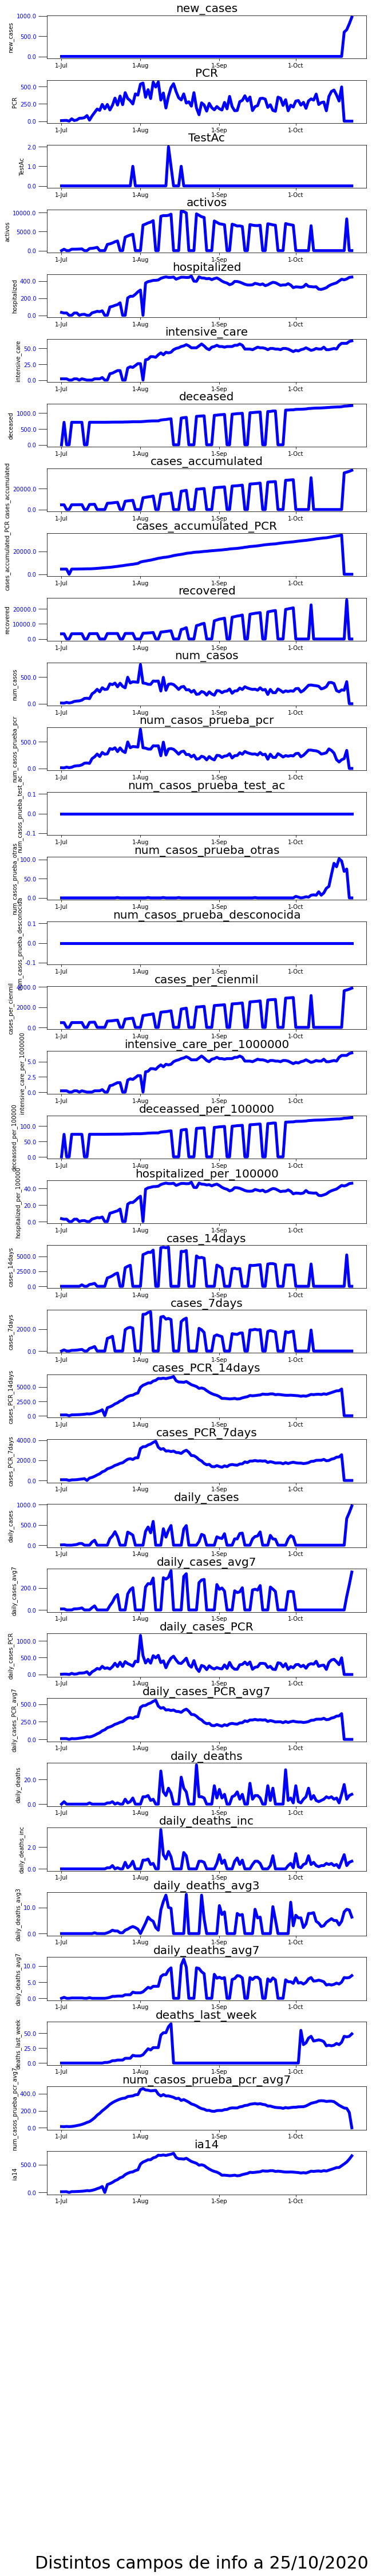

In [16]:
#un par de funciones para formatear

def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparamos los  datos: eliminamos las columnas no numéricas al no poderse representar gráficamente
#generamos un pandas 'datos'que habremos filtrado desde la fecha de los datos que queremos representrar

a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
datos = datos.loc[datos['province']=='Zaragoza']
    
    
#vamos a generar un gráfico matplotlib en al que añadiremos cada una de las columnas
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Distintos campos de info a '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)

#sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette("RdBu_r",19))

#iteramos sobre la lista de columnas y las añadimos como un eje adicional
for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

In [233]:
def grafico_IA14_ratio(datos, campo_casos, provincias):

    clave_avg='daily_cases_PCR_avg7'
    clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    casos_nuevos='daily_cases'
    ventana_IA=14
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    datos_ = datos.fillna(0,axis=1)
    datos_ = datos_[(datos_['date']>=datetime(year=2020,month=7,day=1)) & (datos_['province'].isin(provincias))]

    for provincia in provincias:
        datos_.loc[datos_['province']==provincia,AI]=\
        datos_.loc[datos_['province']==provincia,campos[provincia]].rolling(ventana_IA).sum()\
        /datos_.loc[datos_['province']==provincia,'poblacion']*100000

        serie=datos_.loc[datos_['province']==provincia,AI].pct_change(periods=7).add(1)
        datos_.loc[datos_['province']==provincia,clave_ratio]=serie    
    

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=5, palette=pal)
    # Título
    #g.fig.set_figwidth(20)
    #g.fig.set_figheight(10)
    #g.fig.suptitle(titulo,fontsize=30,color=color_titulos)
    #g.fig.text(0.1, 0.04, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
    #       fontsize=24,color=color_titulos)

    #g.fig.text(0.1,0.01,'Código:{}'.format(github_url),
    #           fontsize=24,horizontalalignment='left',color=color_titulos)


    XmajorFmt = DateFormatter('%d-%b')

    g.map(plt.fill_between, 'date',AI,color=color_diarios)

    ejes = g.axes

    for i,ax in enumerate(ejes):
        #ax.set_title('')
        ax.xaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_titulos)
        ax.grid(False)
        lista_y = ax.get_yticks()
        ax.set_yticks([0,200,400,600,800])
        ax.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_titulos)
        ax.set_xlabel('')
        if i % columnas ==0:
            #ax.set_yticks([0,200,400,600,800])
            ax.yaxis.set_tick_params(labelsize=24,labelcolor=color_titulos)
            ax.yaxis.set_major_locator(plt.MaxNLocator(4))
            ax.set_ylabel(y_IA,size=20,color=color_avg)
        
    
        ax2 = ax.twinx()
        ax2.grid(True)
        ax2.set_yticks([0,1,2,3])
        ax2.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_avg)
        ax2.set_ylim(0,5)
        ax2.plot(datos_['date'].unique(), datos_[datos_['province'] == provincias[i]][clave_ratio], lw=3, color=color_avg)
    
        ax2.xaxis.set_major_formatter(XmajorFmt)
        ax2.xaxis.set_tick_params(labelsize=14,width=5,labelcolor=color_titulos)
        ax2.xaxis.set_major_locator(DayLocator([1]))
        ax2.set_xlabel('')
        ax2.set_title('')
    
        if i % columnas == columnas-1:
        
            ax2.yaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_avg)
            #ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
            ax2.set_yticks([0,1,2,3])
            ax2.set_ylabel(y_ratio,size=20,color=color_avg)
# Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        #ax.set_title('')
        #ax.set_suptitle('')
        ax.text(0.8, .9, label, fontweight="bold",
            ha="center", va="center", size=24,transform=ax.transAxes,color=color_titulos)
    g.map(label,'province')


    axes = g.axes.flatten()
    for ax in axes:
        ax.set_xlabel("")
    #    ax.set_ylabel('')
    g.set_titles('')




    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    plt.savefig('graficos/pcr+_andaluciaa.png',dpi=100)  
    plt.show()
    return

<Figure size 720x360 with 0 Axes>

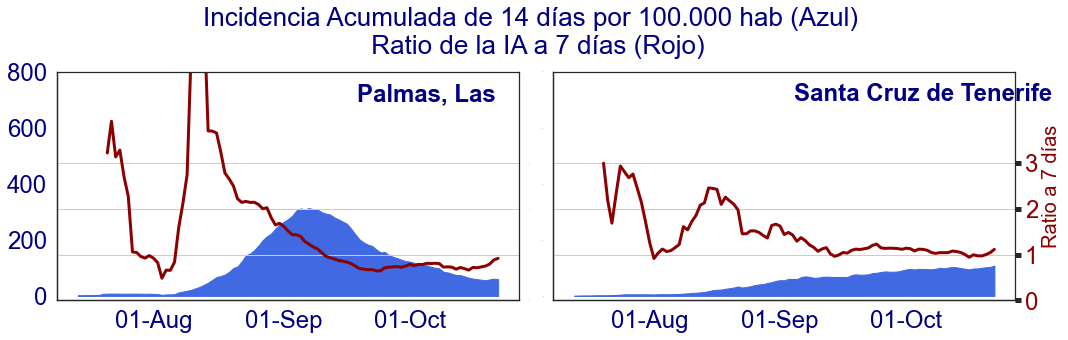

In [234]:
grafico_IA14_ratio(df,campos,['Palmas, Las', 'Santa Cruz de Tenerife'])

<Figure size 720x360 with 0 Axes>

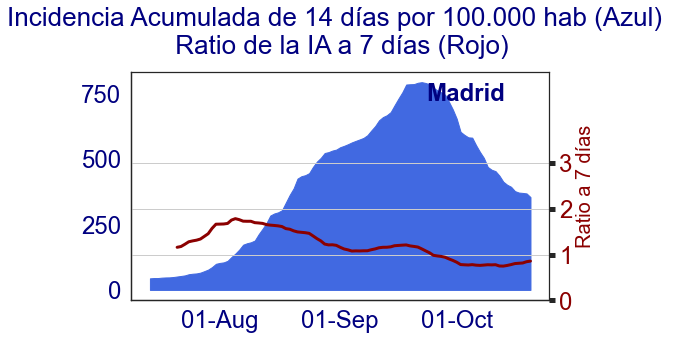

In [235]:
grafico_IA14_ratio(df,campos,['Madrid'])

<Figure size 720x360 with 0 Axes>

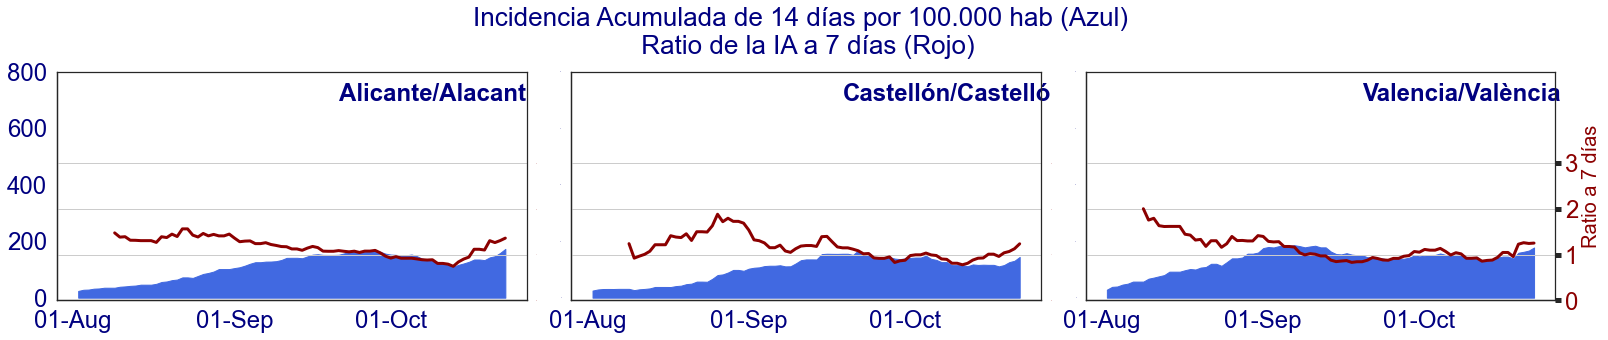

In [236]:
grafico_IA14_ratio(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'])

<Figure size 720x360 with 0 Axes>

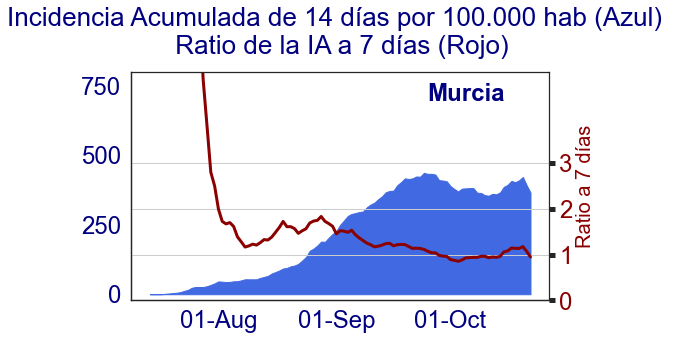

In [237]:
grafico_IA14_ratio(df,campos,['Murcia'])

<Figure size 720x360 with 0 Axes>

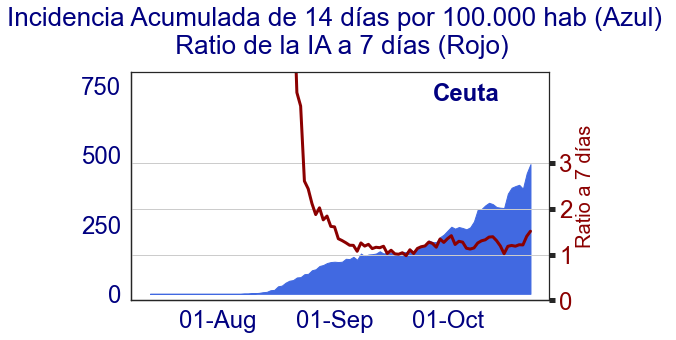

In [238]:
grafico_IA14_ratio(df,campos,['Ceuta'])

<Figure size 720x360 with 0 Axes>

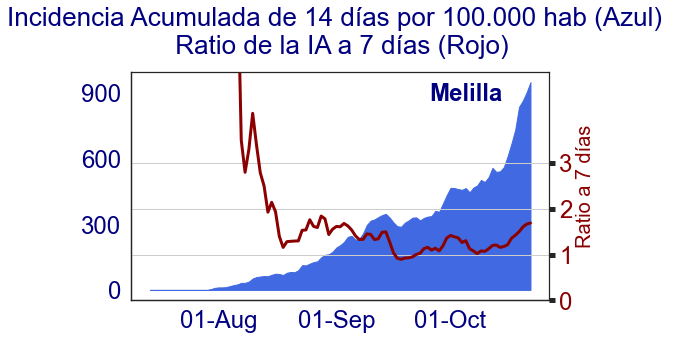

In [239]:
grafico_IA14_ratio(df,campos,['Melilla'])

<Figure size 720x360 with 0 Axes>

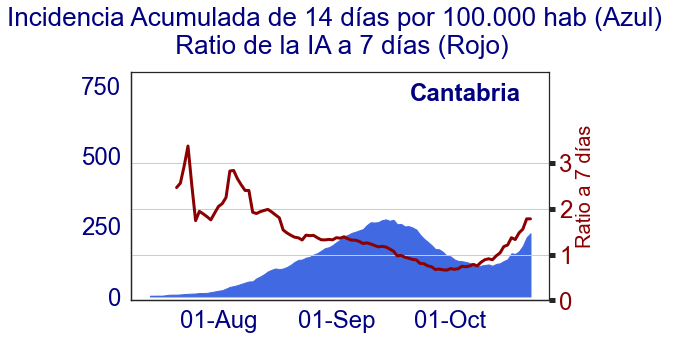

In [240]:
grafico_IA14_ratio(df,campos,['Cantabria'])

<Figure size 720x360 with 0 Axes>

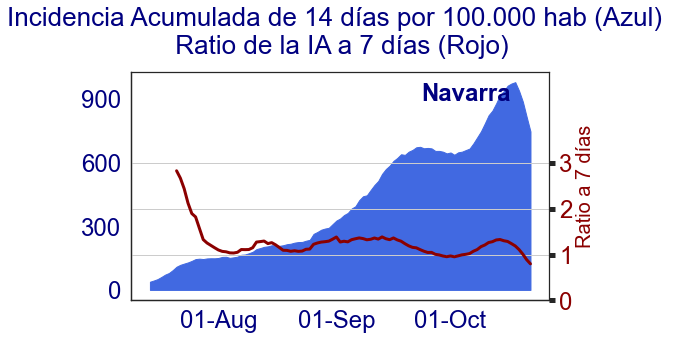

In [241]:
grafico_IA14_ratio(df,campos,['Navarra'])

<Figure size 720x360 with 0 Axes>

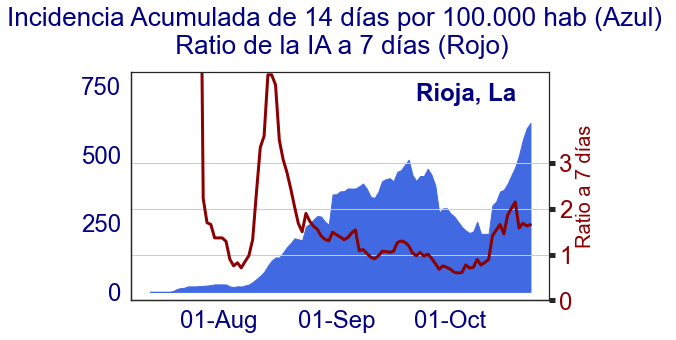

In [242]:
grafico_IA14_ratio(df,campos,['Rioja, La'])

<Figure size 720x360 with 0 Axes>

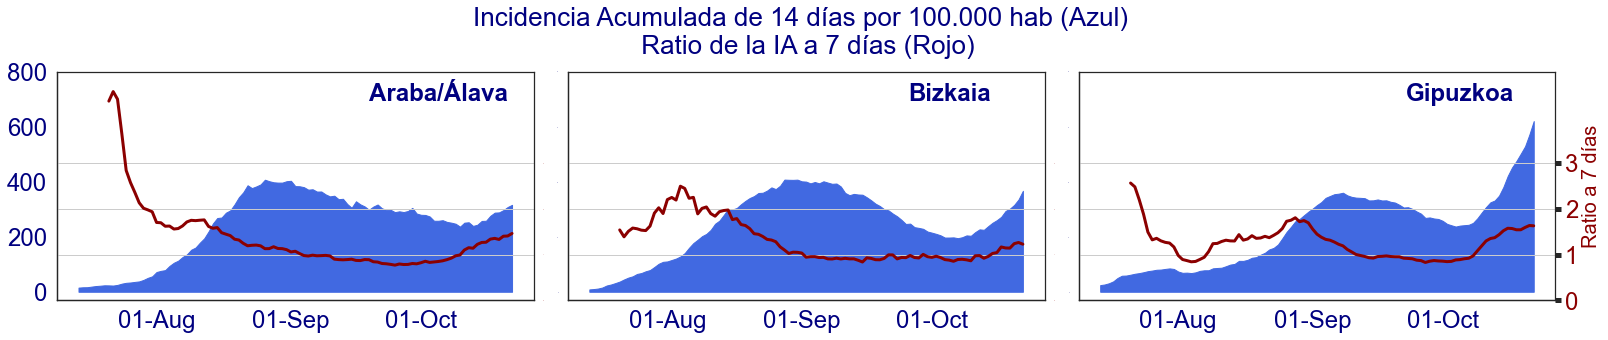

In [243]:
grafico_IA14_ratio(df,campos,['Bizkaia','Araba/Álava','Gipuzkoa'])

<Figure size 720x360 with 0 Axes>

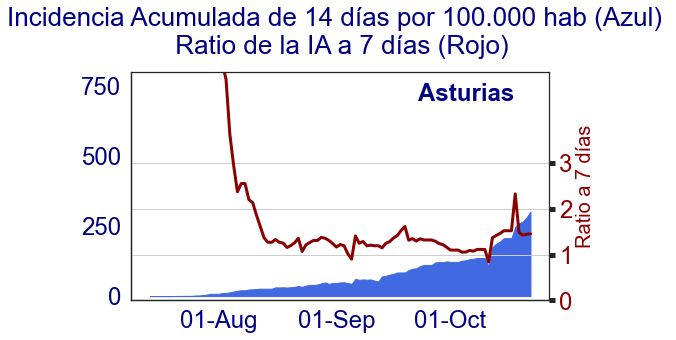

In [244]:
grafico_IA14_ratio(df,campos,['Asturias'])

<Figure size 720x360 with 0 Axes>

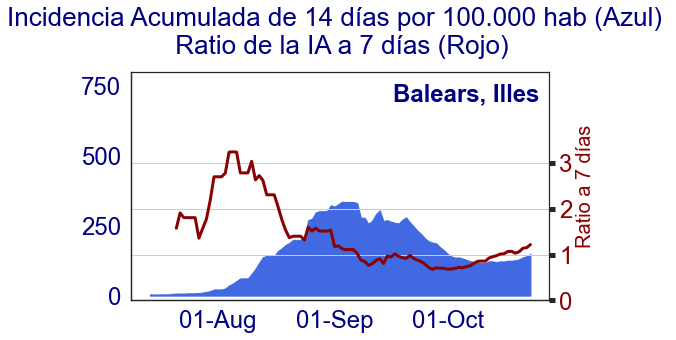

In [245]:
grafico_IA14_ratio(df,campos,['Balears, Illes'])

<Figure size 720x360 with 0 Axes>

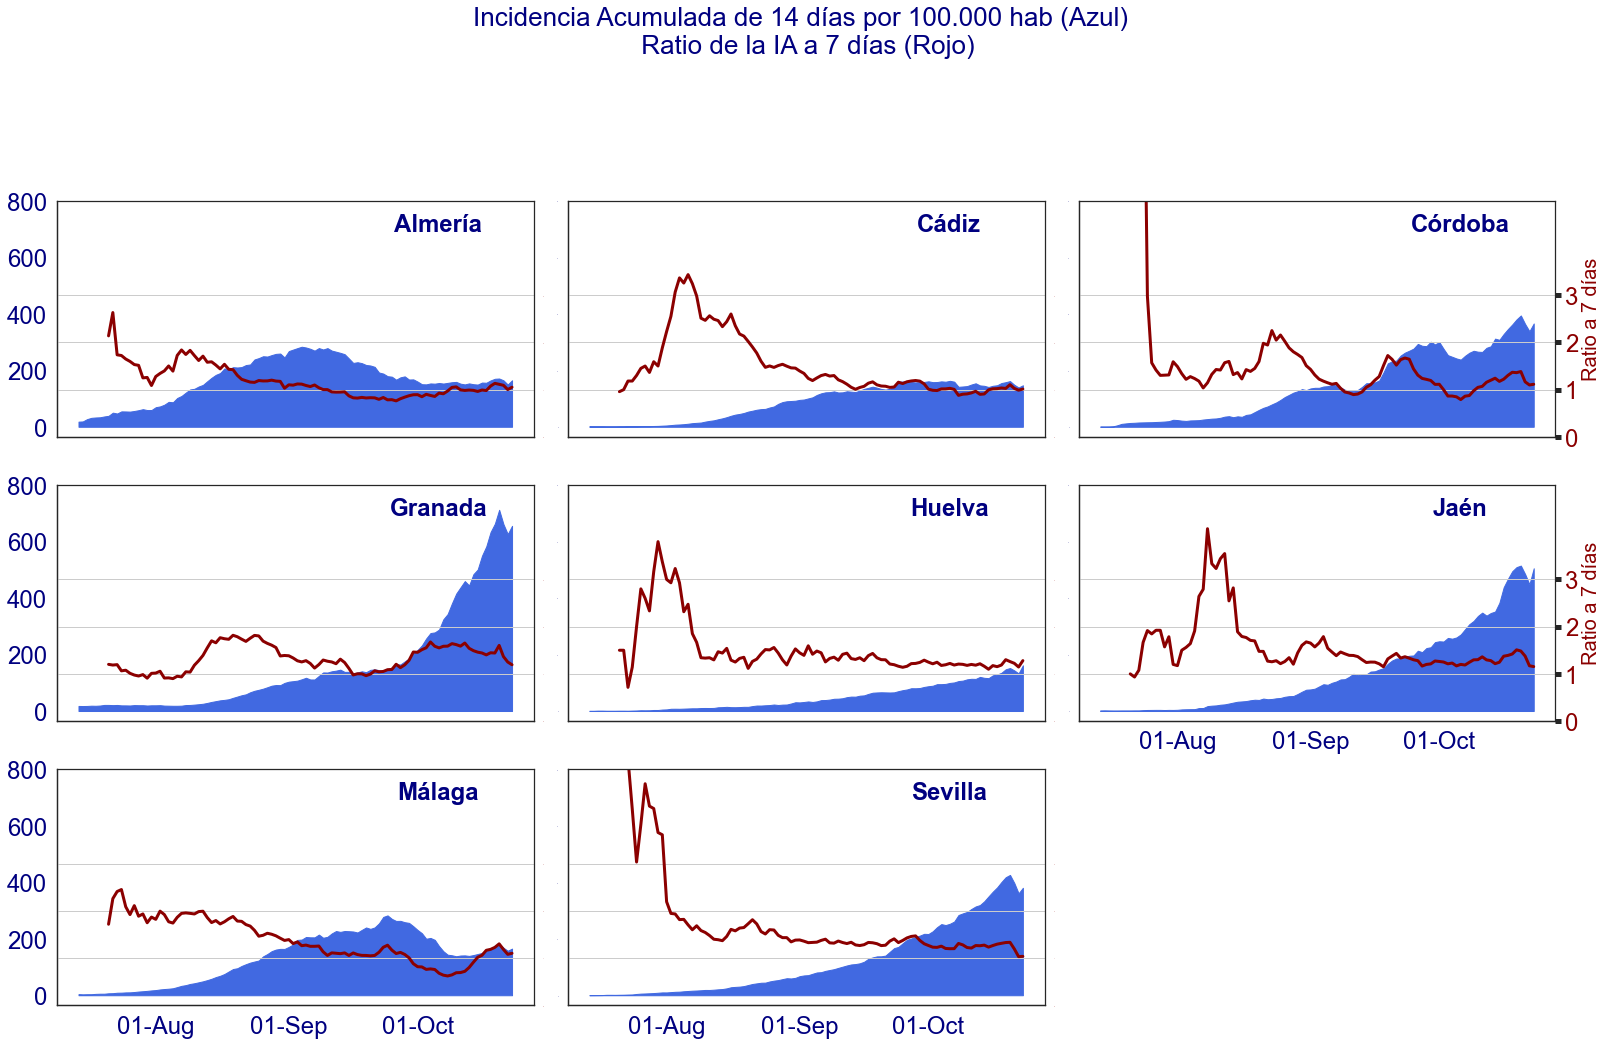

In [246]:
grafico_IA14_ratio(df,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'])

<Figure size 720x360 with 0 Axes>

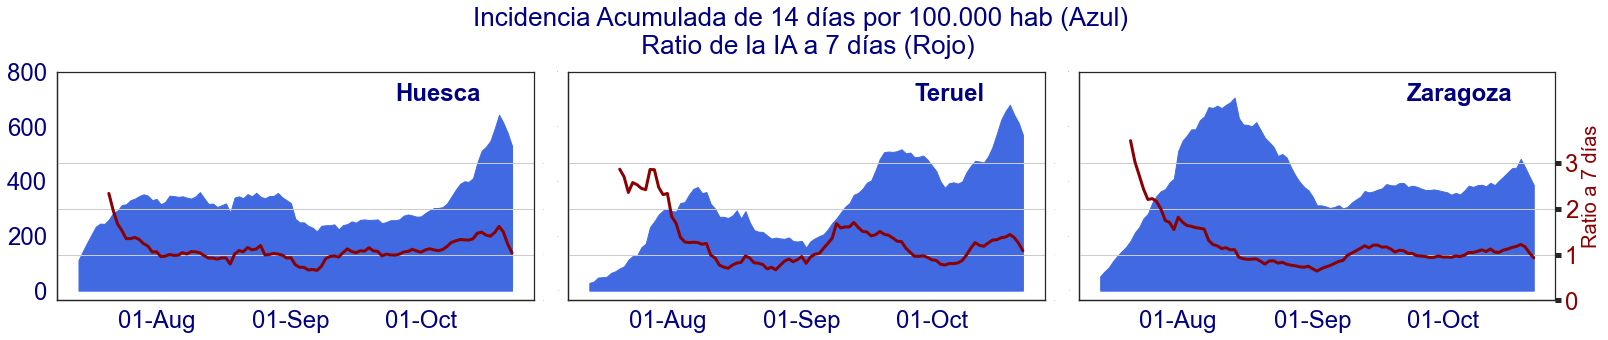

In [247]:
grafico_IA14_ratio(df,campos,['Huesca','Teruel','Zaragoza'])

<Figure size 720x360 with 0 Axes>

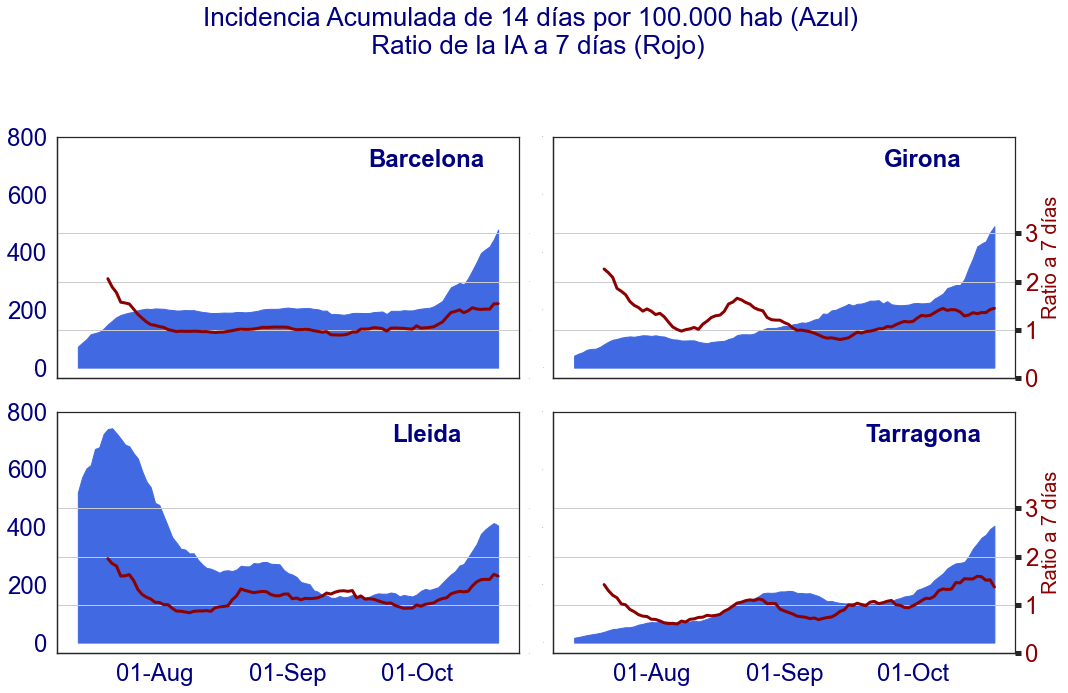

In [248]:
grafico_IA14_ratio(df,campos,['Barcelona','Tarragona','Girona','Lleida'])

<Figure size 720x360 with 0 Axes>

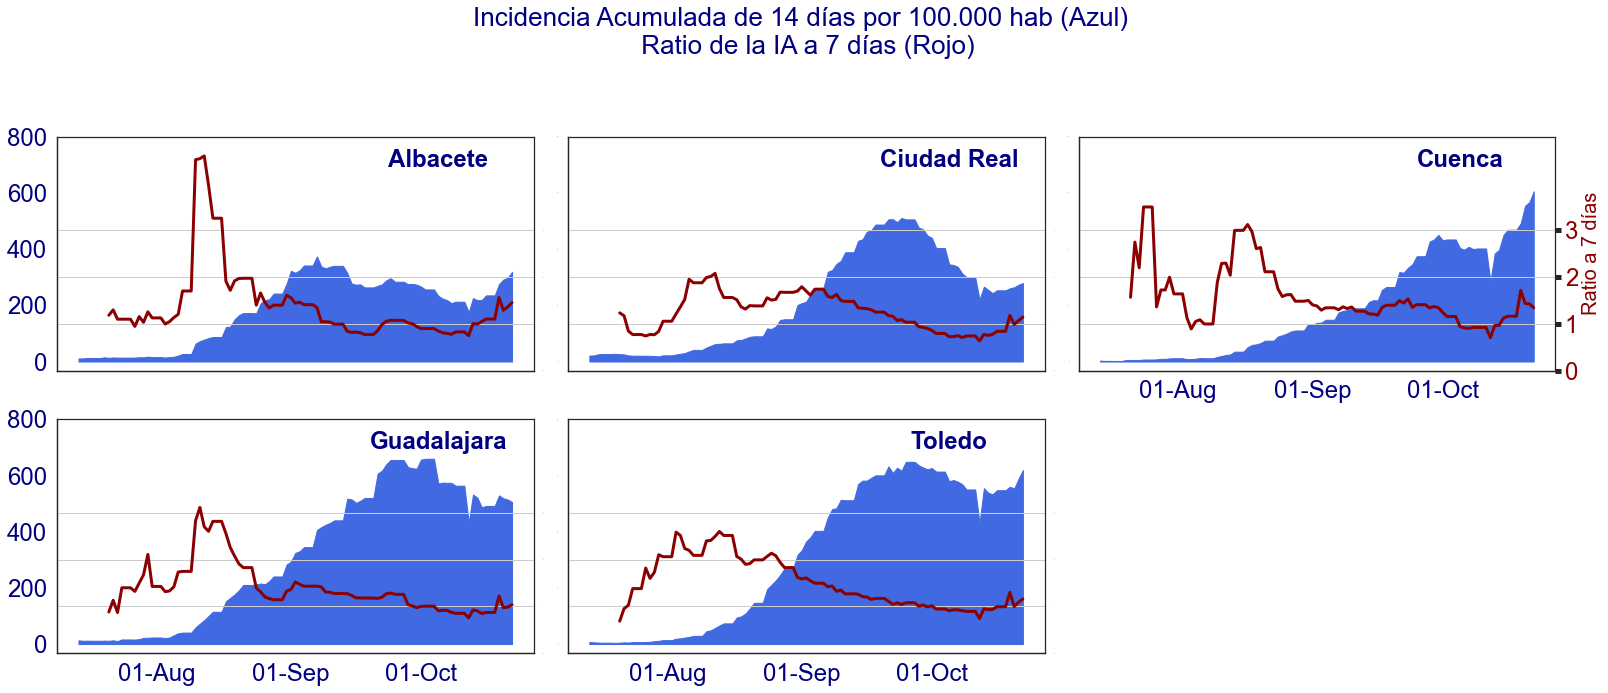

In [249]:
grafico_IA14_ratio(df,campos,['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo'])

<Figure size 720x360 with 0 Axes>

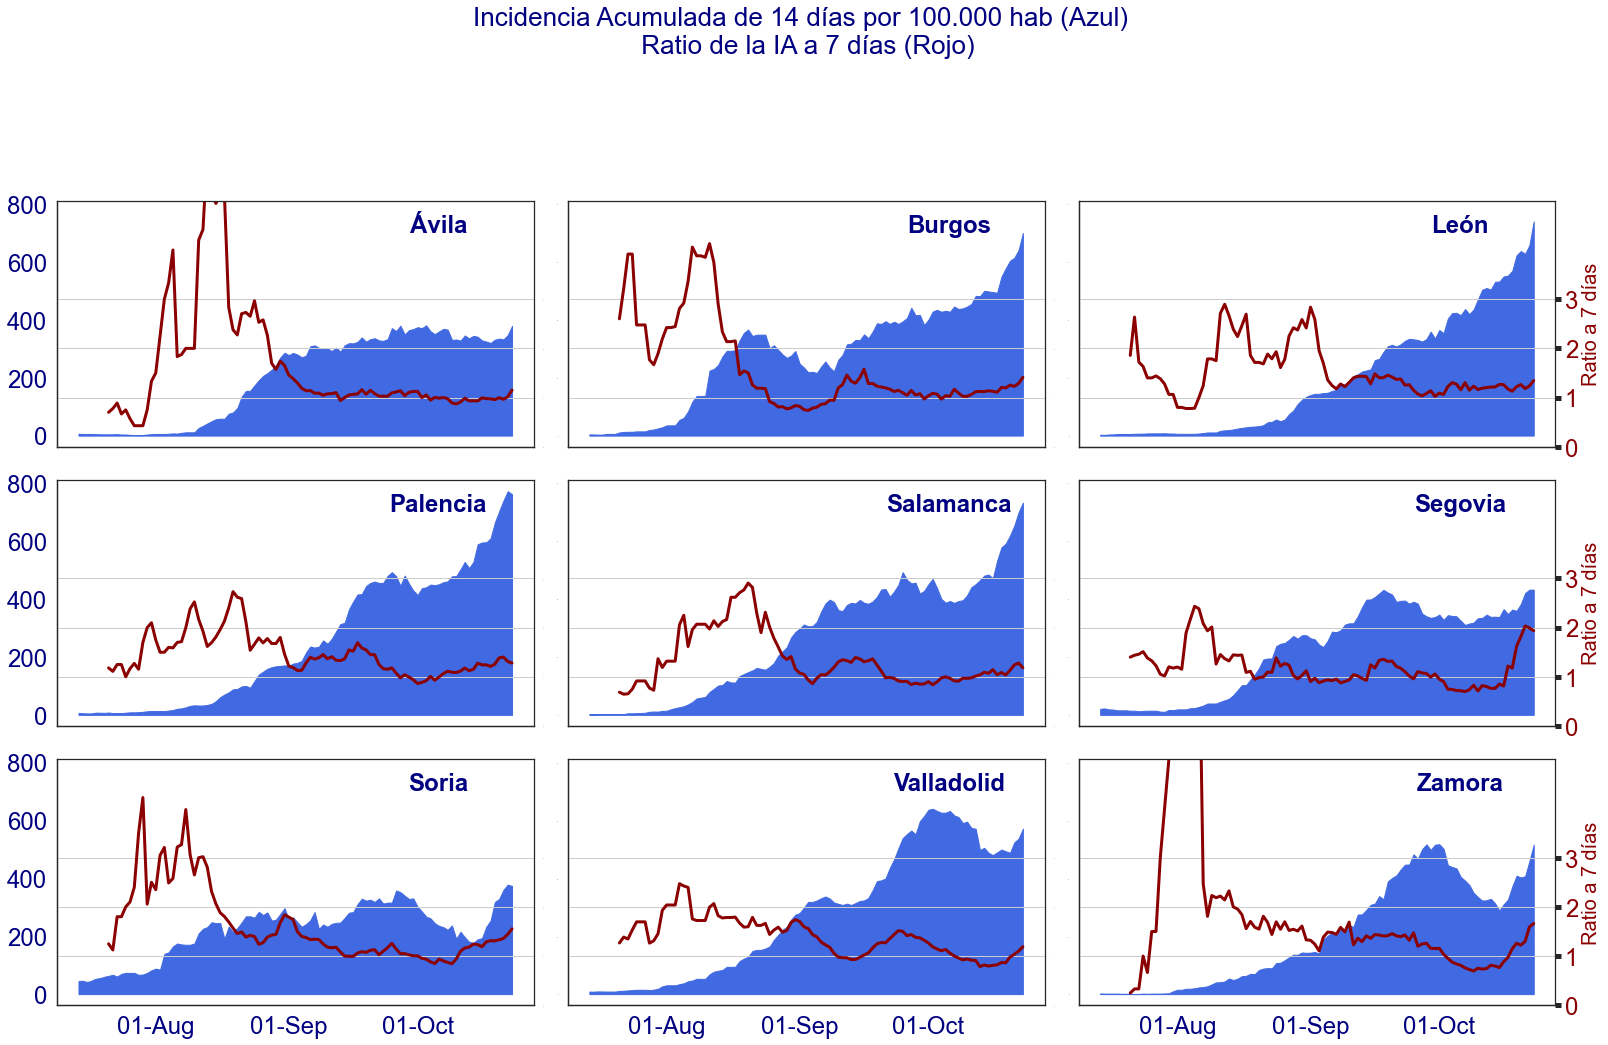

In [250]:
grafico_IA14_ratio(df,campos,['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora'])

<Figure size 720x360 with 0 Axes>

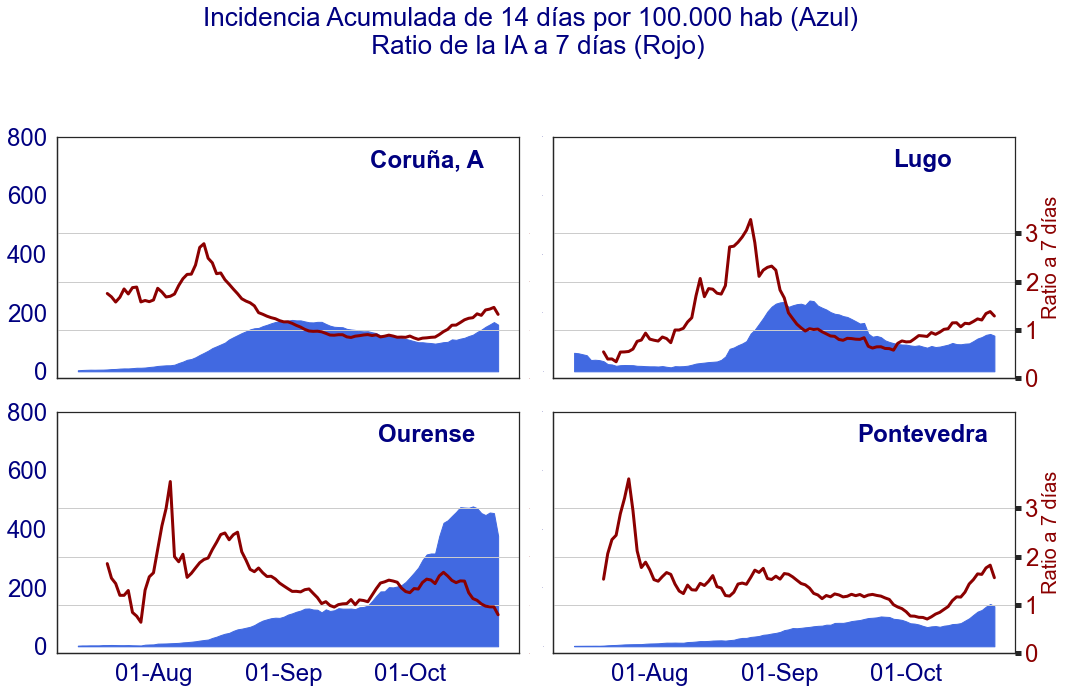

In [251]:
grafico_IA14_ratio(df,campos,['Coruña, A','Lugo','Ourense','Pontevedra'])

<Figure size 720x360 with 0 Axes>

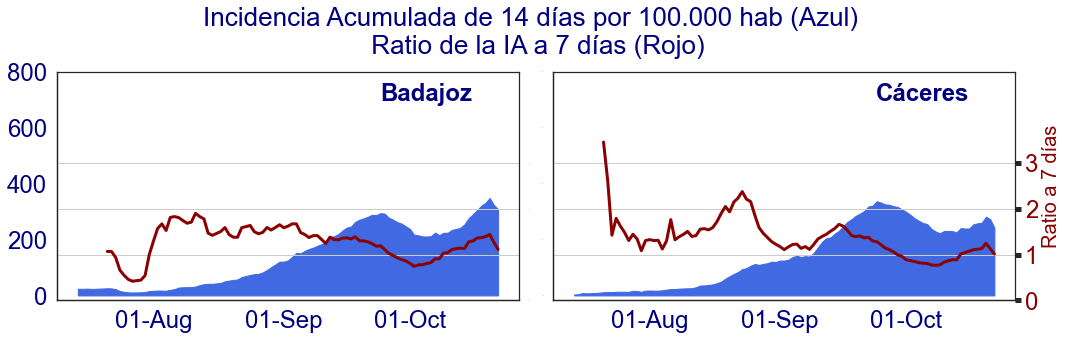

In [252]:
grafico_IA14_ratio(df,campos,['Badajoz','Cáceres'])